<a href="https://colab.research.google.com/github/HMRLKE/probing/blob/main/RIGO_november_by_tag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [4]:
%cd drive/MyDrive/deptree/2023_11_26_dep_tags


/content/drive/MyDrive/deptree/2023_11_26_dep_tags


In [5]:
%ls


dep_tree_recursive_plus_target_2023_11_27.tsv   separated_tags_stats.txt
separated_tags_stats_recursive_train.txt        separated_tags_stats_unperturbed.txt
separated_tags_stats_recursive_unperturbed.txt  target_only_2023_11_27.tsv
separated_tags_stats_train.txt


Deptree perturbed data analysis: on different deptree tags

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from collections import defaultdict
import seaborn as sns
import warnings


heatmap_cmap = "GnBu"

barplot_kws = dict(linewidth=0.2, edgecolor="black", palette="Paired")
bar_4x4_kwargs = barplot_kws.copy()
bar_4x4_kwargs['capsize'] = 0.11
bar_4x4_kwargs['ci'] = None


deptree = pd.read_csv('separated_tags_stats.txt', sep='\t')
#deptree_r = pd.read_csv('separated_tags_stats_recursive.txt', sep='\t')


deptree = deptree.drop(columns=['model_name', 'match_count'])
#deptree_r = deptree_r.drop(columns=['model_name', 'match_count'])
#deptree_r['deptree_tag'] = deptree_r['deptree_tag'].apply(lambda x: x.split(','))

print(deptree)

       language morph_tag pos_tag deptree_tag  all_count    accuracy
0     Afrikaans    number    noun        amod         58   98.275862
1     Afrikaans    number    noun       appos          4  100.000000
2     Afrikaans    number    noun        case         53   96.226415
3     Afrikaans    number    noun          cc         10  100.000000
4     Afrikaans    number    noun       ccomp         28  100.000000
...         ...       ...     ...         ...        ...         ...
3851       Urdu    number    noun        nmod         83   92.771084
3852       Urdu    number    noun       nsubj          1  100.000000
3853       Urdu    number    noun      nummod         25   88.000000
3854       Urdu    number    noun         obl          7  100.000000
3855       Urdu    number    noun       punct          3  100.000000

[3856 rows x 6 columns]


agreement rules' hypotheses testing

In [10]:
import pandas as pd

# Assuming deptree is your DataFrame
# Load your DataFrame here if it's not already loaded
# deptree = pd.read_csv('your_data.csv')

# Overall average accuracy
overall_avg_accuracy = deptree['accuracy'].mean()
print("Overall Average Accuracy:", overall_avg_accuracy)

# Average accuracy for deptree_tag == 'subject'
subject_avg_accuracy = deptree[deptree['deptree_tag'] == 'csubj']['accuracy'].mean()
print("Average Accuracy for 'subject':", subject_avg_accuracy)

# Average accuracy for deptree_tag == 'subject' and pos_tag == 'verb'
subject_verb_avg_accuracy = deptree[(deptree['deptree_tag'] == 'csubj') & (deptree['pos_tag'] == 'verb')]['accuracy'].mean()
print("Average Accuracy for 'subject' and 'verb':", subject_verb_avg_accuracy)

# Average accuracy for deptree_tag == 'subject', pos_tag == 'verb', and morph_tag == 'number'
subject_verb_number_avg_accuracy = deptree[(deptree['deptree_tag'] == 'csubj') & (deptree['pos_tag'] == 'verb') & (deptree['morph_tag'] == 'number')]['accuracy'].mean()
print("Average Accuracy for 'subject', 'verb', and 'number':", subject_verb_number_avg_accuracy)


Overall Average Accuracy: 90.0697039600553
Average Accuracy for 'subject': 92.84376018246985
Average Accuracy for 'subject' and 'verb': 96.23655913978494
Average Accuracy for 'subject', 'verb', and 'number': 100.0


In [6]:
import scipy.stats as stats
# ANOVA Test
anova_result = stats.f_oneway(*(deptree[deptree['deptree_tag'] == tag]['accuracy'] for tag in deptree['deptree_tag'].unique()))
print(f"ANOVA Result: F-Statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


ANOVA Result: F-Statistic = 2.793362019719956, p-value = 1.4637159651799246e-07


<ipython-input-7-622d5646eb8a>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(avg_accuracy_by_deptree, avg_accuracy_by_deptree.mean())


   deptree_tag    accuracy
22        list  100.000000
18       fixed  100.000000
8        ccomp   93.713848
28         obl   93.210299
1        advcl   92.997859
12       csubj   92.843760
30   parataxis   92.696261
34       xcomp   92.512494
17        expl   92.257458
25       nsubj   92.215858
23        mark   91.533924
5          aux   91.312689
0          acl   91.199705
2       advmod   91.064776
4        appos   90.757395
9     compound   90.687863
19        flat   90.217789
31       punct   89.983389
7           cc   89.751868
24        nmod   89.645569
11         cop   89.640984
10        conj   89.488882
21        iobj   89.396883
27         obj   89.338633
14         det   88.848975
3         amod   87.722506
13         dep   86.505556
33    vocative   86.410256
16  dislocated   86.363636
15   discourse   85.531873
26      nummod   85.290259
6         case   85.101771
32  reparandum   75.000000
29      orphan   73.696145
20    goeswith    0.000000 accuracy    87.055405
dtype:

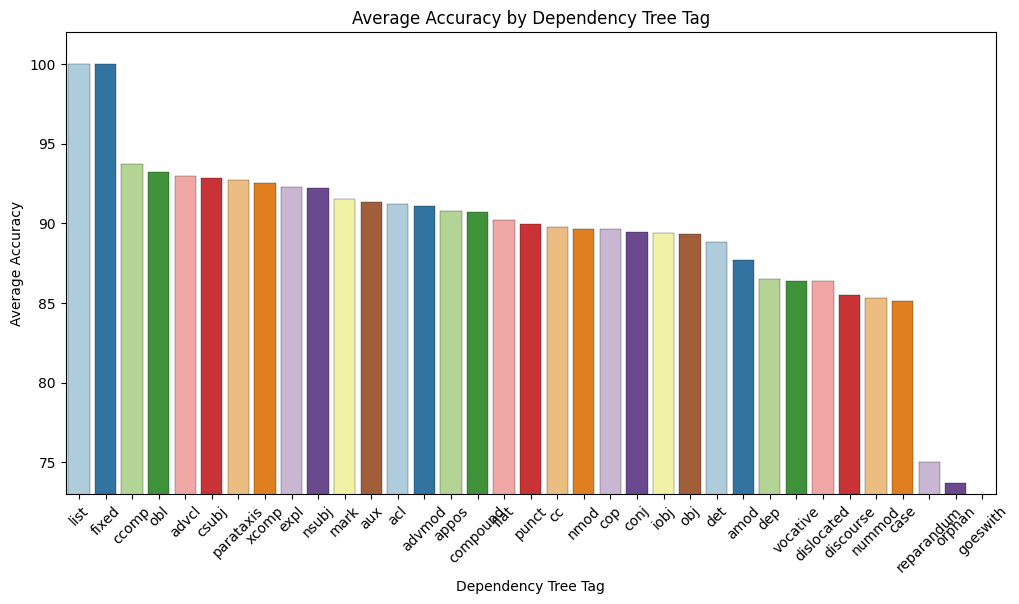

In [7]:


# Group by 'deptree_tag' and calculate mean accuracy
avg_accuracy_by_deptree = deptree.groupby('deptree_tag')['accuracy'].mean().reset_index()

# Sort the results for better visualization
avg_accuracy_by_deptree = avg_accuracy_by_deptree.sort_values(by='accuracy', ascending=False)
print(avg_accuracy_by_deptree, avg_accuracy_by_deptree.mean())

# Plotting using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='deptree_tag', y='accuracy', data=avg_accuracy_by_deptree,**barplot_kws,)
plt.xticks(rotation=45)
plt.title('Average Accuracy by Dependency Tree Tag')
ax.set_ylabel('Average Accuracy')
ax.set_xlabel('Dependency Tree Tag')
ax.set_ylim(73, 102)
plt.show()


In [8]:
import statsmodels.stats.multicomp as multi

# Perform Tukey's HSD Test
tukey = multi.MultiComparison(deptree['accuracy'], deptree['deptree_tag'])
tukey_result = tukey.tukeyhsd()
print(tukey_result.summary())

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1     group2   meandiff p-adj    lower    upper   reject
---------------------------------------------------------------
       acl      advcl   1.7982    1.0   -6.9631  10.5594  False
       acl     advmod  -0.1349    1.0   -7.9459    7.676  False
       acl       amod  -3.4772 0.9999  -12.0442   5.0898  False
       acl      appos  -0.4423    1.0   -9.8556    8.971  False
       acl        aux    0.113    1.0   -8.9386   9.1646  False
       acl       case  -6.0979  0.577  -14.2723   2.0764  False
       acl         cc  -1.4478    1.0   -9.1814   6.2857  False
       acl      ccomp   2.5141    1.0   -7.5491  12.5774  False
       acl   compound  -0.5118    1.0  -11.0095   9.9858  False
       acl       conj  -1.7108    1.0   -9.3985   5.9769  False
       acl        cop  -1.5587    1.0   -9.7767   6.6592  False
       acl      csubj   1.6441    1.0   -9.4623  12.7504  False
       acl        dep  -4.6941 0.9998  -

#Deptree recursive perturbed data analysis: on different deptree tags

## Subject-Verb Agreement

In [7]:
%ls

dep_tree_recursive_plus_target_2023_11_27.tsv   separated_tags_stats.txt
separated_tags_stats_recursive_train.txt        separated_tags_stats_unperturbed.txt
separated_tags_stats_recursive_unperturbed.txt  target_only_2023_11_27.tsv
separated_tags_stats_train.txt


In [8]:
deptreerpt = pd.read_csv('dep_tree_recursive_plus_target_2023_11_27.tsv', sep='\t')
targ_only = pd.read_csv('target_only_2023_11_27.tsv', sep='\t')

targ_only = targ_only.drop(columns=['model_name', 'match_count'])
deptreerpt = deptreerpt.drop(columns=['model_name', 'match_count'])

In [10]:
print(deptreerpt)

        language morph_tag pos_tag                  deptree_tag  all_count  \
0      Afrikaans    number    noun                         amod         35   
1      Afrikaans    number    noun                      amod,cc          4   
2      Afrikaans    number    noun                    amod,conj          2   
3      Afrikaans    number    noun            amod,conj,conj,cc          1   
4      Afrikaans    number    noun    amod,conj,conj,conj,punct          1   
...          ...       ...     ...                          ...        ...   
31113       Urdu    number    noun                 nummod,punct          1   
31114       Urdu    number    noun                     obl,case          3   
31115       Urdu    number    noun                obl,nmod,case          2   
31116       Urdu    number    noun  obl,nmod,nmod,nmod,compound          2   
31117       Urdu    number    noun                        punct          3   

         accuracy  
0       68.571429  
1       50.000000  
2  

In [14]:
import pandas as pd

deptag = 'nsubj'
postag = 'verb'
morphtag = 'number'

# Overall average accuracy from targ_only
overall_avg_accuracy = targ_only['accuracy'].mean()
print("Overall Target Accuracy:", overall_avg_accuracy)

overall_rpt_accuracy = deptreerpt['accuracy'].mean()
print("Overall Deptree plus Target Accuracy:", overall_rpt_accuracy)

# Function to check if 'subj' is in the deptree_tag
def startswith_nsubj(tag):
    return tag.startswith('nsubj')

def contains_nsubj(tag):
    return 'nsubj' in tag

def contains_csubj(tag):
    return 'csubj' in tag

# Average accuracy for 'subj' in deptree_tag
subj_avg_accuracy = deptreerpt[deptreerpt['deptree_tag'].apply(startswith_nsubj)]['accuracy'].mean()
print(f"Average Accuracy for {deptag} in deptree_tag:", subj_avg_accuracy)

# Average accuracy for 'subj' in deptree_tag and pos_tag == 'verb'
subj_verb_avg_accuracy = deptreerpt[deptreerpt['deptree_tag'].apply(startswith_nsubj) & (deptreerpt['pos_tag'] == 'verb')]['accuracy'].mean()
print(f"Average Accuracy for {deptag} in deptree_tag and 'verb':", subj_verb_avg_accuracy)

# Average accuracy for 'subj' in deptree_tag, pos_tag == 'verb', and morph_tag == 'number'
subj_verb_number_avg_accuracy = deptreerpt[deptreerpt['deptree_tag'].apply(startswith_nsubj) & (deptreerpt['pos_tag'] == 'verb') & (deptreerpt['morph_tag'] == 'number')]['accuracy'].mean()
print(f"Average Accuracy for {deptag}, {postag}, and {morphtag}:", subj_verb_number_avg_accuracy)
diff1 = overall_avg_accuracy - subj_avg_accuracy
diff2 = overall_avg_accuracy - subj_verb_avg_accuracy
print(f"{diff1},{diff2}")


SyntaxError: ignored

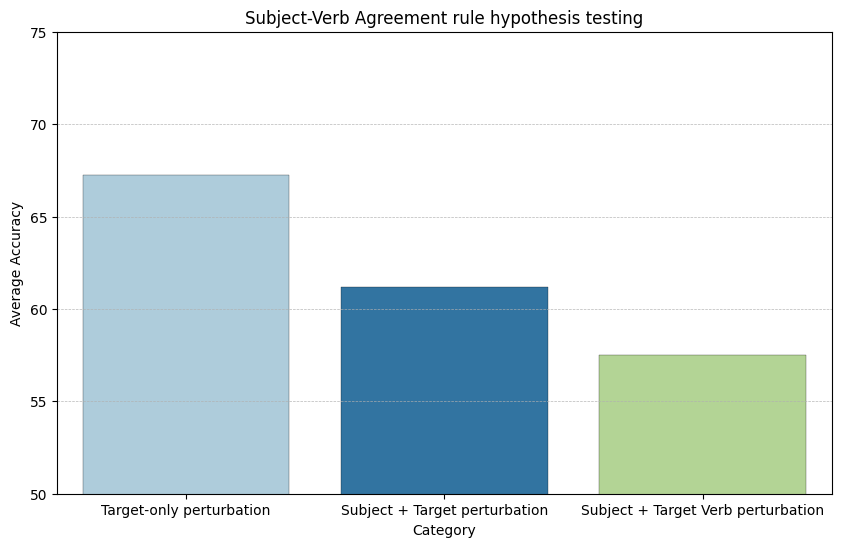

In [27]:
data = {
    'Category': ['Target-only perturbation', 'Subject + Target perturbation', 'Subject + Target Verb perturbation'],
    'Average Accuracy': [overall_avg_accuracy, subj_avg_accuracy, subj_verb_avg_accuracy]
}

df_plot = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Average Accuracy', data=df_plot,**barplot_kws,)
plt.title('Subject-Verb Agreement rule hypothesis testing')
plt.ylabel('Average Accuracy')
plt.ylim(50, 75)  # Assuming accuracy is in percentage
plt.grid(True, linestyle='--', linewidth=0.5, axis='y', alpha=0.9)
plt.show()

##Subject-Object Agreement

In [ ]:
import pandas as pd

# Assuming deptreerpt and targ_only are your DataFrames
# Load your DataFrames here if they're not already loaded

# Overall average accuracy from targ_only
overall_avg_accuracy = targ_only['accuracy'].mean()
print("Overall Target Accuracy:", overall_avg_accuracy)

overall_rpt_accuracy = deptreerpt['accuracy'].mean()
print("Overall Deptree plus Target Accuracy:", overall_rpt_accuracy)

# Function to check if 'subj' is in the deptree_tag
def contains_subj(tag):
    return 'subj' in tag

# Average accuracy for 'subj' in deptree_tag
subj_avg_accuracy = deptreerpt[deptreerpt['deptree_tag'].apply(contains_subj)]['accuracy'].mean()
print("Average Accuracy for 'subj' in deptree_tag:", subj_avg_accuracy)

# Average accuracy for 'subj' in deptree_tag and pos_tag == 'verb'
subj_verb_avg_accuracy = deptreerpt[deptreerpt['deptree_tag'].apply(contains_subj) & (deptreerpt['pos_tag'] == 'verb')]['accuracy'].mean()
print("Average Accuracy for 'subj' in deptree_tag and 'verb':", subj_verb_avg_accuracy)

# Average accuracy for 'subj' in deptree_tag, pos_tag == 'verb', and morph_tag == 'number'
subj_verb_number_avg_accuracy = deptreerpt[deptreerpt['deptree_tag'].apply(contains_subj) & (deptreerpt['pos_tag'] == 'verb') & (deptreerpt['morph_tag'] == 'number')]['accuracy'].mean()
print("Average Accuracy for 'subj', 'verb', and 'number':", subj_verb_number_avg_accuracy)


         language morph_tag pos_tag deptree_tag  all_count    accuracy
0       Afrikaans    number    noun      advmod         12   91.666667
1       Afrikaans    number    noun      advmod          1  100.000000
1       Afrikaans    number    noun       punct          1  100.000000
2       Afrikaans    number    noun        amod        243   99.588477
3       Afrikaans    number    noun        amod          5  100.000000
...           ...       ...     ...         ...        ...         ...
148909       Urdu    number    noun         obl          1  100.000000
148909       Urdu    number    noun      nummod          1  100.000000
148910       Urdu    number    noun         obl          1  100.000000
148910       Urdu    number    noun       punct          1  100.000000
148911       Urdu    number    noun       punct         41   97.560976

[557567 rows x 6 columns]


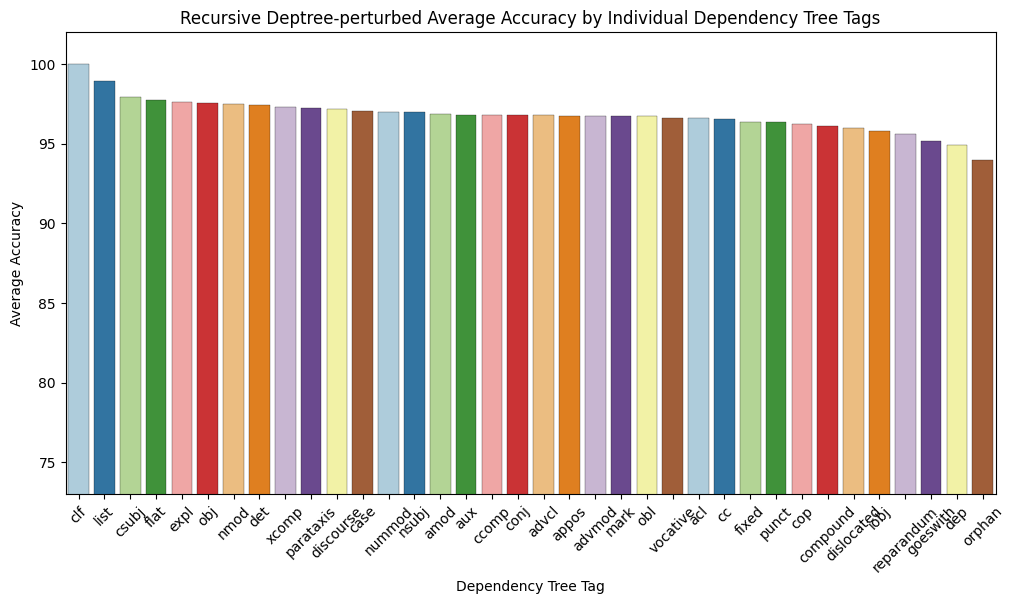

In [33]:

exploded_deptree = deptree_r.explode('deptree_tag')
print(exploded_deptree)
# Group by 'deptree_tag' and calculate mean accuracy
avg_accuracy_by_tag = exploded_deptree.groupby('deptree_tag')['accuracy'].mean().reset_index()

# Sort the results in ascending order for better visualization
avg_accuracy_by_tag = avg_accuracy_by_tag.sort_values(by='accuracy', ascending=False)

# Plotting using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(y='accuracy', x='deptree_tag', data=avg_accuracy_by_tag, **barplot_kws,)
plt.title('Recursive Deptree-perturbed Average Accuracy by Individual Dependency Tree Tags')
ax.set_ylabel('Average Accuracy')
ax.set_xlabel('Dependency Tree Tag')
plt.xticks(rotation=45)
ax.set_ylim(73, 102)
plt.show()


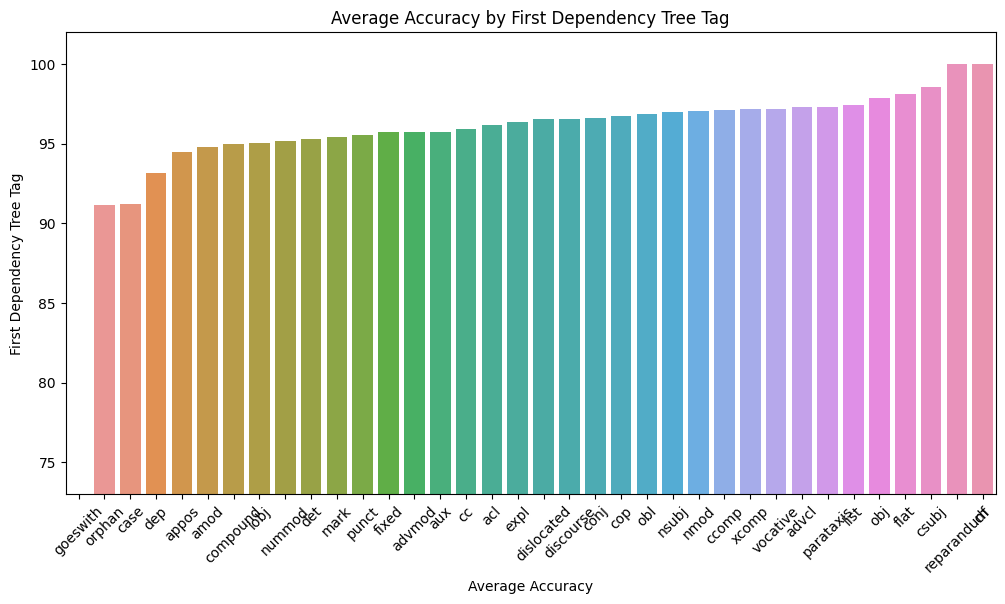

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'deptree_r'
# deptree_r = pd.read_csv('your_file.csv')  # Uncomment and use this if you need to read from a file

# Create a new column for the first element of 'deptree_tag'
deptree_r['first_deptree_tag'] = deptree_r['deptree_tag'].apply(lambda x: x.split(',')[0])

# Group by the new column and calculate mean accuracy
avg_accuracy_by_first_tag = deptree_r.groupby('first_deptree_tag')['accuracy'].mean().reset_index()

# Sort the results for better visualization
avg_accuracy_by_first_tag = avg_accuracy_by_first_tag.sort_values(by='accuracy', ascending=True)

# Plotting using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(y='accuracy', x='first_deptree_tag', data=avg_accuracy_by_first_tag)
plt.title('Average Accuracy by First Dependency Tree Tag')
ax.set_xlabel('Average Accuracy')
ax.set_ylabel('First Dependency Tree Tag')
ax.set_ylim(73, 102)
plt.xticks(rotation=45)
plt.show()


In [ ]:
#merged_df = pd.merge(merged_df, dedup_tar_perturbed, on=['task', 'language'], suffixes=('', '_tar'))
aggregations = ['Task', 'Language']
#print(merged_df)
#melted_df = pd.melt(merged_df, id_vars=['language'], value_vars=['accuracy_unperturbed', 'accuracy_perturbed'], var_name='accuracy_type', value_name='accuracy')
#print(melted_df)
for aggregation in aggregations:
  plt.figure(figsize=(35, 15))
  ax = sns.barplot(x=aggregation, y="value", hue="variable",errorbar = None, data=pd.melt(merged_df, id_vars=[aggregation], value_vars=['unperturbed_accuracy', 'random_accuracy','deptree_accuracy','deptree_r_accuracy','r2_accuracy','l2_accuracy','b_accuracy']),**barplot_kws,)
  ax.set_xlabel(aggregation)
  ax.set_ylabel('Accuracy')
  ax.set_ylim(0.70, 1)
  ax.set_title(f'Accuracy Aggregated by {aggregation}')
  ax.legend(title="Accuracy Type")
  plt.xticks(rotation=45)
  plt.show()

# Calculate the 'Effect' column
#merged_df['Effect'] = (1 - (merged_df['accuracy_perturbed'] / merged_df['accuracy_unperturbed']))*100
#print(merged_df)


NameError: ignored

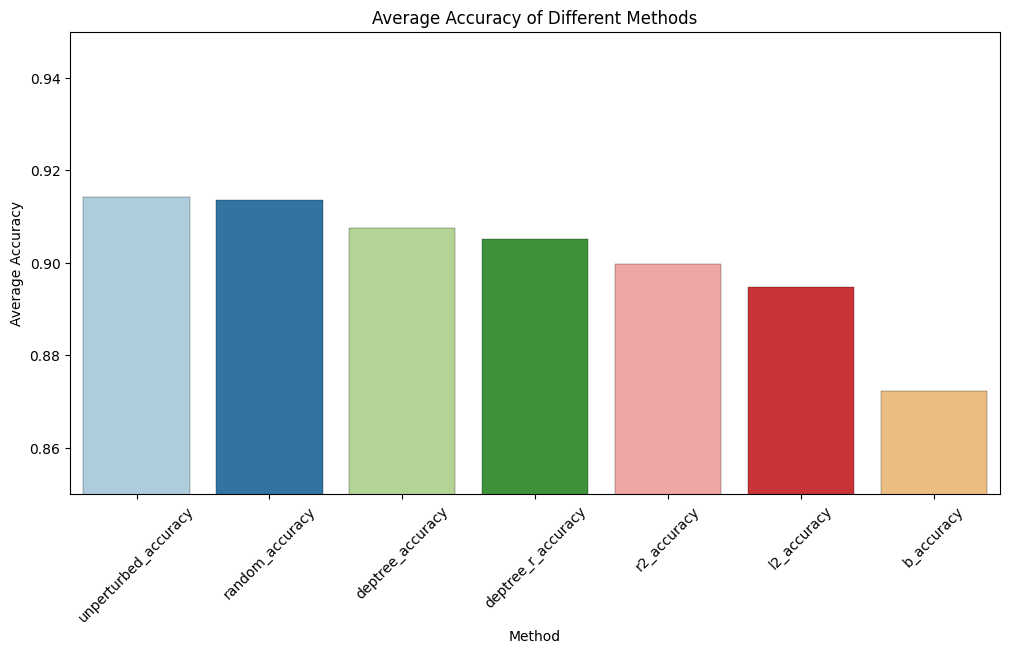

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

label_mapping = {
    'unperturbed_accuracy': 'Unperturbed Acc.',
    'random_accuracy': 'Random Acc.',
    'deptree_accuracy': 'Deptree Acc.',
    'deptree_r_accuracy': 'Deptree R Acc.',
    'b_accuracy': 'B Acc.',
    'l2_accuracy': 'L2 Acc.',
    'r2_accuracy': 'R2 Acc.'
}


# Calculate average accuracies for each method, excluding 't_accuracy' and 'deptree_r_p_t_accuracy'
methods = ['unperturbed_accuracy', 'random_accuracy', 'deptree_accuracy',
           'deptree_r_accuracy', 'b_accuracy', 'l2_accuracy', 'r2_accuracy']

avg_accuracies = {}
for method in methods:
    avg_accuracies[method] = merged_df[method].mean()

# Convert to DataFrame for plotting
avg_accuracy_df = pd.DataFrame(list(avg_accuracies.items()), columns=['Method', 'AverageAccuracy'])

# Sort the DataFrame in descending order of AverageAccuracy
avg_accuracy_df = avg_accuracy_df.sort_values(by='AverageAccuracy', ascending=False)

# Plotting using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Method', y='AverageAccuracy', data=avg_accuracy_df,**barplot_kws,)
ax.set_ylim(0.85, 0.95)
plt.xticks(rotation=45)
plt.title('Average Accuracy of Different Methods')
plt.ylabel('Average Accuracy')
plt.xlabel('Method')
plt.show()


0    0.914259
1    0.913701
2    0.907487
3    0.905116
6    0.899695
5    0.894860
4    0.872293
Name: AverageAccuracy, dtype: float64


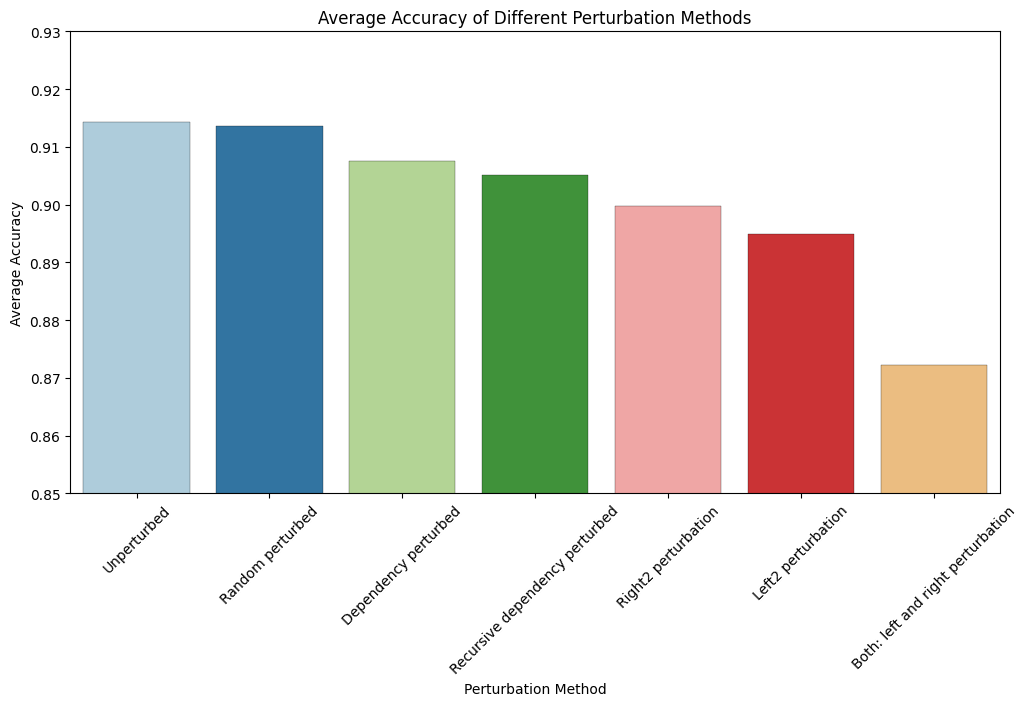

In [ ]:
# Define a mapping from original column names to new labels
label_mapping = {
    'unperturbed_accuracy': 'Unperturbed',
    'random_accuracy': 'Random perturbed',
    'deptree_accuracy': 'Dependency perturbed',
    'deptree_r_accuracy': 'Recursive dependency perturbed',
    'b_accuracy': 'Both: left and right perturbation',
    'l2_accuracy': 'Left2 perturbation',
    'r2_accuracy': 'Right2 perturbation'
}

# Calculate average accuracies for each method, excluding 't_accuracy' and 'deptree_r_p_t_accuracy'
methods = ['unperturbed_accuracy', 'random_accuracy', 'deptree_accuracy',
           'deptree_r_accuracy', 'b_accuracy', 'l2_accuracy', 'r2_accuracy']

avg_accuracies = {}
for method in methods:
    # Use new labels in avg_accuracies dictionary
    new_label = label_mapping[method]
    avg_accuracies[new_label] = merged_df[method].mean()

# Convert to DataFrame for plotting
avg_accuracy_df = pd.DataFrame(list(avg_accuracies.items()), columns=['Method', 'AverageAccuracy'])

# Sort the DataFrame in descending order of AverageAccuracy
avg_accuracy_df = avg_accuracy_df.sort_values(by='AverageAccuracy', ascending=False)
print(avg_accuracy_df['AverageAccuracy'])

# Plotting using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Method', y='AverageAccuracy', data=avg_accuracy_df,**barplot_kws,)
ax.set_ylim(0.85, 0.93)
plt.xticks(rotation=45)
plt.title('Average Accuracy of Different Perturbation Methods')
plt.ylabel('Average Accuracy')
plt.xlabel('Perturbation Method')
plt.show()



             task    language  accuracy_unperturbed  accuracy_perturbed  \
0    gender_propn    Latvian               0.944583            0.943396   
1    gender_propn     Polish               0.882598            0.888350   
2    gender_propn    Russian               0.950895            0.985248   
3    gender_propn  Icelandic               0.843945            0.870925   
4    gender_propn      Dutch               0.931250            0.938666   
..            ...         ...                   ...                 ...   
228      case_adj      Czech               0.983416            0.987331   
229      case_adj     German               0.970000            0.980634   
230     case_verb    Russian               0.985489            0.998110   
231     case_verb    Finnish               0.983086            0.987137   
232     case_verb      Latin               0.906068            0.943370   

       Effect  
0    0.125675  
1   -0.651676  
2   -3.612694  
3   -3.196895  
4   -0.796302  
.. 

<ipython-input-14-a3c0fcf7df62>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='accuracy_type', y='accuracy', data=melted_df, ci=None)


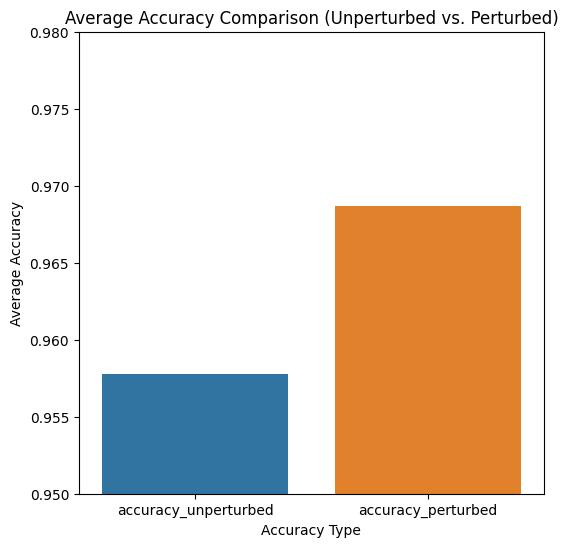

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
print(merged_df)

# Create a DataFrame from the sample data
merged_df = melted_df

import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn bar plot for comparing average accuracies
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='accuracy_type', y='accuracy', data=melted_df, ci=None)
ax.axhline(y=0.723, color='gray', linestyle='--', label='RandomBERT baseline')
ax.set_ylim(0.95, 0.98)
# Add labels and title
plt.xlabel('Accuracy Type')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy Comparison (Unperturbed vs. Perturbed)')

plt.show()



# This was the hypothesis:

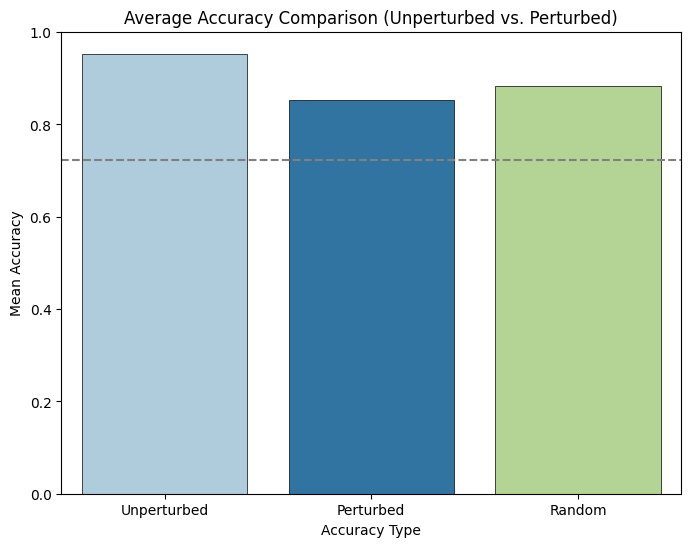

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {'task': ['A', 'B', 'C'],
        'accuracy_unperturbed': [0.95, 0.92, 0.99],
        'accuracy_perturbed': [0.82, 0.89, 0.85],
        'accuracy_random': [0.87, 0.91, 0.87]}

# Create a DataFrame from the sample data
merged_df = pd.DataFrame(data)

# Calculate the means for both columns
average_accuracy_unperturbed = merged_df['accuracy_unperturbed'].mean()
average_accuracy_perturbed = merged_df['accuracy_perturbed'].mean()
average_accuracy_random = merged_df['accuracy_random'].mean()

# Create a bar plot for the averages
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Unperturbed', 'Perturbed', 'Random'], y=[merged_df['accuracy_unperturbed'].mean(), merged_df['accuracy_perturbed'].mean(), merged_df['accuracy_random'].mean()],**barplot_kws,)
ax.axhline(y=0.723, color='gray', linestyle='--', label='RandomBERT baseline')


# Add labels and title
plt.xlabel('Accuracy Type')
plt.ylabel('Mean Accuracy')
plt.title('Average Accuracy Comparison (Unperturbed vs. Perturbed)')

plt.show()


#Deptree relations in the dataset

## List of the relevant deptree connection types


In [ ]:
import pandas as pd

# Load your data from the input file (replace 'extended_stats.tsv' with your actual file)
with open('extended_stats.tsv', 'r') as f:
    lines = f.readlines()

# Initialize an empty list to store processed data
processed_data = []

# Initialize a set to store unique dependency types
unique_dependency_types = set()

# Iterate through the lines and split into columns
for line in lines:
    parts = line.strip().split('\t')
    language, pos, file = parts[0], parts[1], parts[2]
    dependencies = parts[3:]

    # Add dependency types to the set
    for dependency in dependencies:
        tag, _ = dependency.split('_')
        unique_dependency_types.add(tag)

    # Append the language, pos, file, and original dependencies to the processed data

# Create a list of unique dependency types (without counts) from the set
dependency_types_list = list(unique_dependency_types)
simple_tags = []
for element in dependency_types_list:
  listed = element.split(":")
  tag = listed[0]
  ptag = listed[-1]
  simple_tags.append(tag)
simple_tags = list(set(simple_tags))
print(dependency_types_list)
print(simple_tags)
# Create the header for the new fixed TSV
header = ['Language', 'POS', 'File'] + dependency_types_list

# Update the DataFrame columns with the new header

df = pd.DataFrame(columns = header)



['advcl:tcl', 'xcomp:ds', 'obl:tmod', 'conj:extend', 'flat:range', 'advcl', 'vocative', 'parataxis:obj', 'flat:sibl', 'flat:foreign', 'xcomp', 'flat', 'case', 'advcl:svc', 'csubj', 'advcl:relcl', 'dislocated:csubj', 'amod', 'vocative:cl', 'obl', 'nmod:gsubj', 'compound:lvc', 'nsubj:outer', 'parataxis:nsubj', 'dislocated', 'ccomp:obj', 'nsubj:cop', 'csubj:cop', 'nmod:poss', 'compound:smixut', 'parataxis:discourse', 'obl:mod', 'fixed', 'advmod:tmod', 'flat:repeat', 'iobj:agent', 'acl:cleft', 'compound:prt', 'discourse', 'conj:svc', 'obj:lvc', 'advmod', 'orphan', 'xcomp:pred', 'parataxis:insert', 'advmod:emph', 'compound:nn', 'ccomp:relcl', 'advcl:cleft', 'nsubj', 'amod:flat', 'parataxis', 'mark', 'nsubj:pass', 'acl:relcl', 'reparandum', 'obl:arg', 'obl:cmpr', 'nmod:flat', 'flat:name', 'compound:redup', 'acl', 'parataxis:rel', 'obl:pmod', 'dep:comp', 'obj:agent', 'nummod:gov', 'parataxis:appos', 'csubj:relcl', 'list', 'ccomp', 'csubj:cleft', 'clf', 'compound:svc', 'nmod:npmod', 'nmod:arg'

In [ ]:
import pandas as pd

simple = True
# Create the header for the new fixed TSV dynamically
header = ['Language', 'POS', 'File'] + simple_tags
rows = []

with open('extended_stats.tsv', 'r') as f:
    lines = f.readlines()

for line in lines:
    parts = line.strip().split('\t')
    language, pos, file = parts[0], parts[1], parts[2]
    dependencies = parts[3:]
    row_dict = {col: 0 for col in header[3:]}
    if simple:
      tags = simple_tags
    for dep_type in tags:
        for element in dependencies:
          listed = element.split('_')
          count = listed[-1]
          name = listed[0]
          #count = sum(1 for dependency in dependencies if dep_type in dependency)
          if dep_type in name:
            row_dict[dep_type] = count
        rowlist = parts[:3]+[*row_dict.values()]
        #print(rowlist)
    rows.append(rowlist)


# Create a DataFrame with the dynamically generated header
df = pd.DataFrame(rows, columns=header)
print(df)
# Save the fixed DataFrame to a new TSV file (replace 'fixed_data.tsv' with your desired output file name)
df.to_csv('fixed_data.tsv', sep='\t', index=False)


      Language          POS       File nsubj nummod fixed parataxis advcl  \
0    Afrikaans  number_noun    dev.tsv     9      0     0         0     0   
1    Afrikaans  number_noun   test.tsv     8      0     0         0     0   
2    Afrikaans  number_noun  train.tsv   514      0     0         0     0   
3       Arabic     case_adj    dev.tsv     1      0     0         6     0   
4       Arabic     case_adj   test.tsv     4      0     1         1     1   
..         ...          ...        ...   ...    ...   ...       ...   ...   
703       Urdu  gender_noun   test.tsv    75      0     0         0     0   
704       Urdu  gender_noun  train.tsv   902      1     0         0     0   
705       Urdu  number_noun    dev.tsv    97      0     0         0     0   
706       Urdu  number_noun   test.tsv    75      0     0         0     0   
707       Urdu  number_noun  train.tsv   899      1     0         0     0   

    vocative mark  ...   obl iobj advmod orphan list ccomp conj clf  \
0   

      Language          POS       File  nsubj  nummod  fixed  parataxis  \
0    Afrikaans  number_noun    dev.tsv      9       0      0          0   
1    Afrikaans  number_noun   test.tsv      8       0      0          0   
2    Afrikaans  number_noun  train.tsv    514       0      0          0   
3       Arabic     case_adj    dev.tsv      1       0      0          6   
4       Arabic     case_adj   test.tsv      4       0      1          1   
..         ...          ...        ...    ...     ...    ...        ...   
703       Urdu  gender_noun   test.tsv     75       0      0          0   
704       Urdu  gender_noun  train.tsv    902       1      0          0   
705       Urdu  number_noun    dev.tsv     97       0      0          0   
706       Urdu  number_noun   test.tsv     75       0      0          0   
707       Urdu  number_noun  train.tsv    899       1      0          0   

     advcl  vocative  mark  ...   obl  iobj  advmod  orphan  list  ccomp  \
0        0         0   

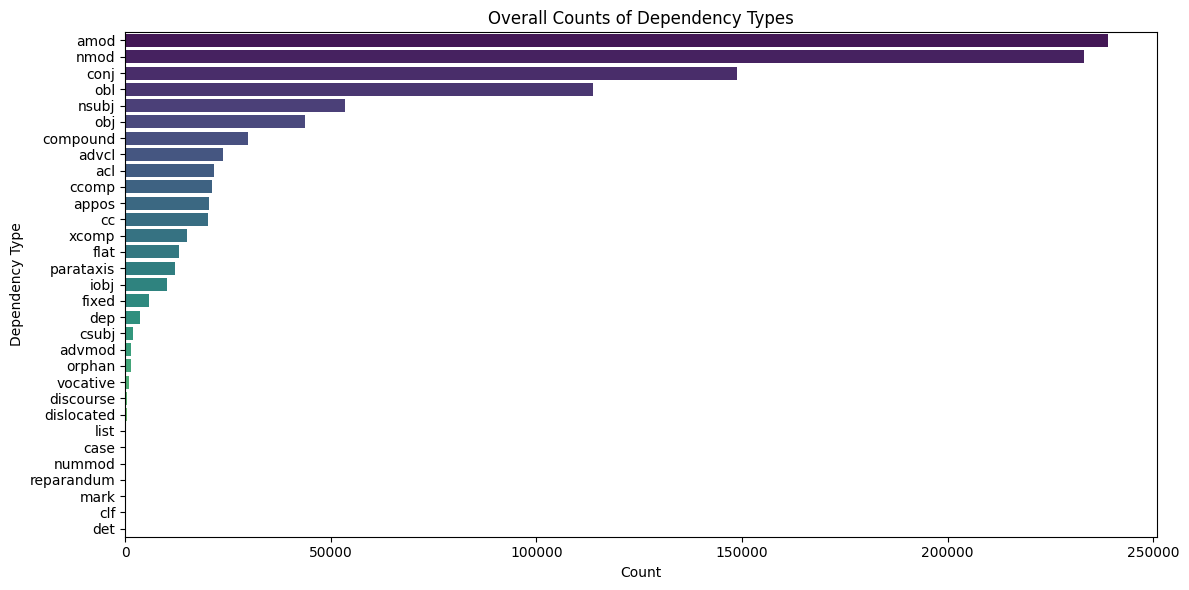

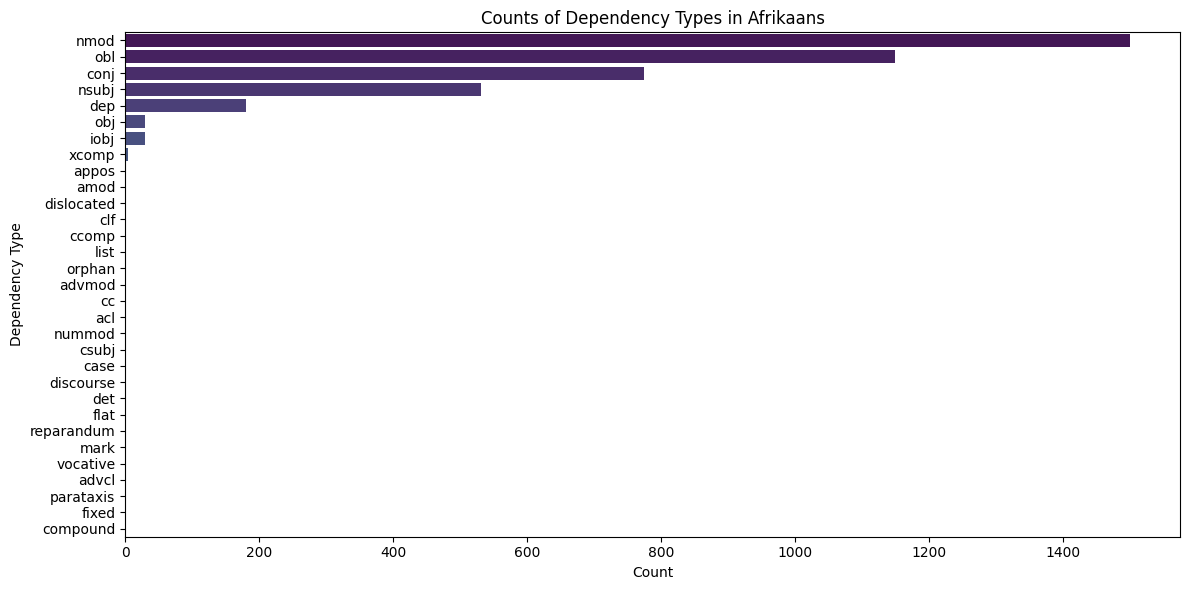

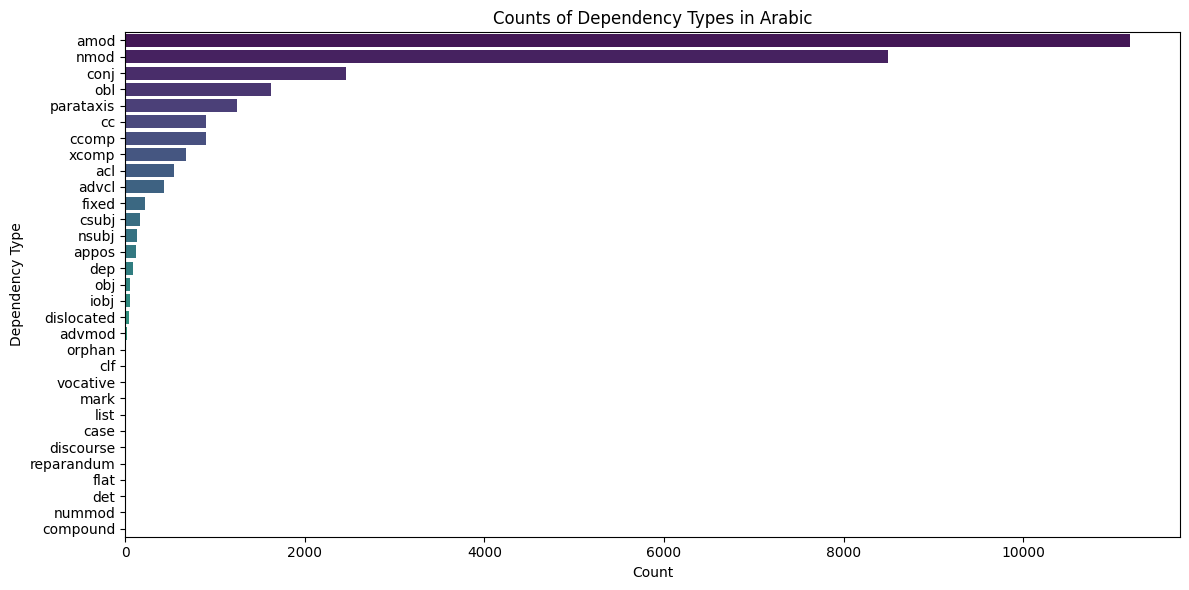

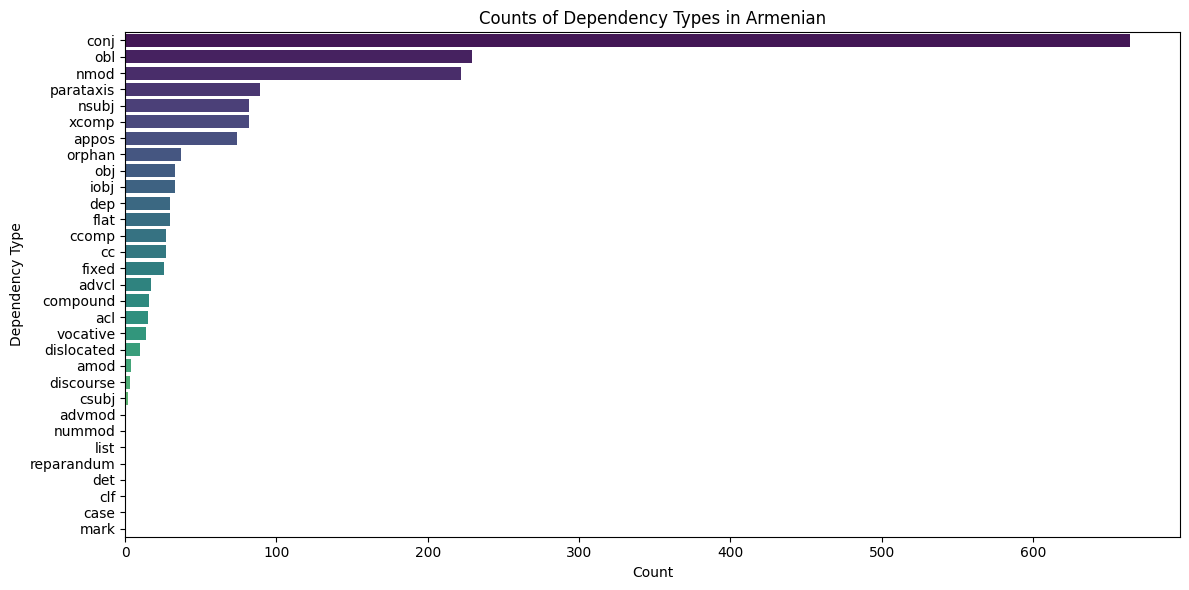

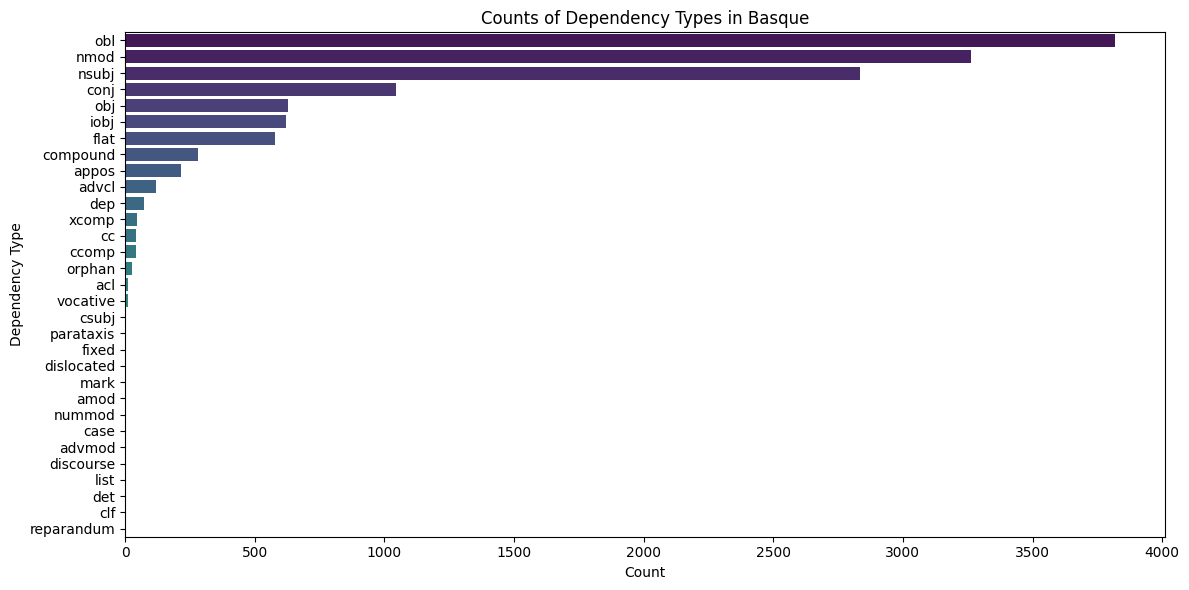

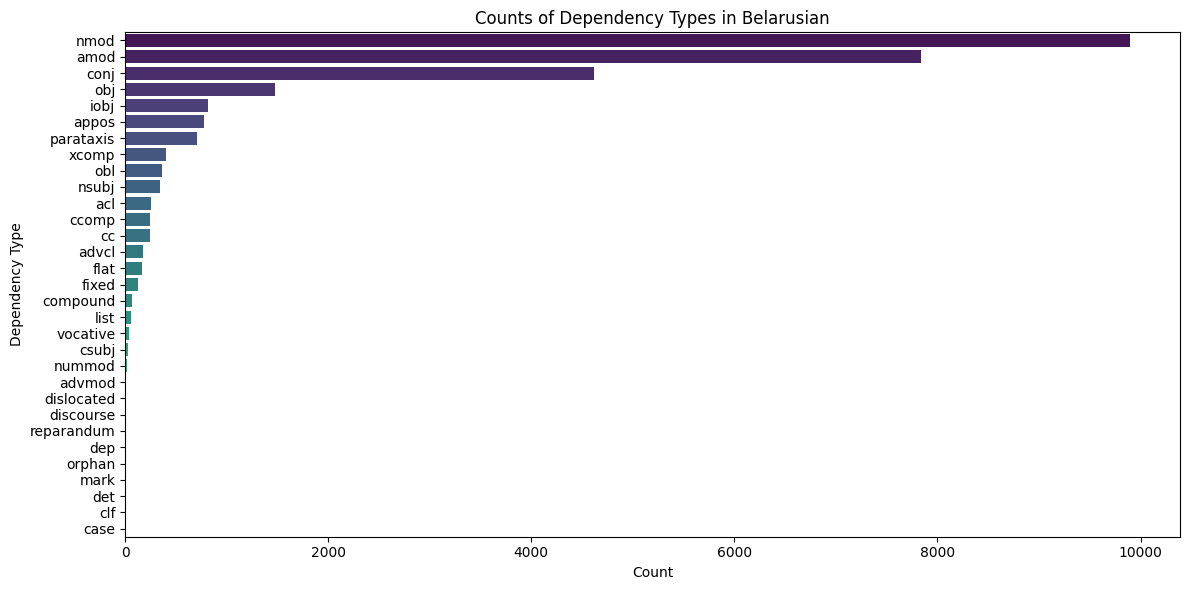

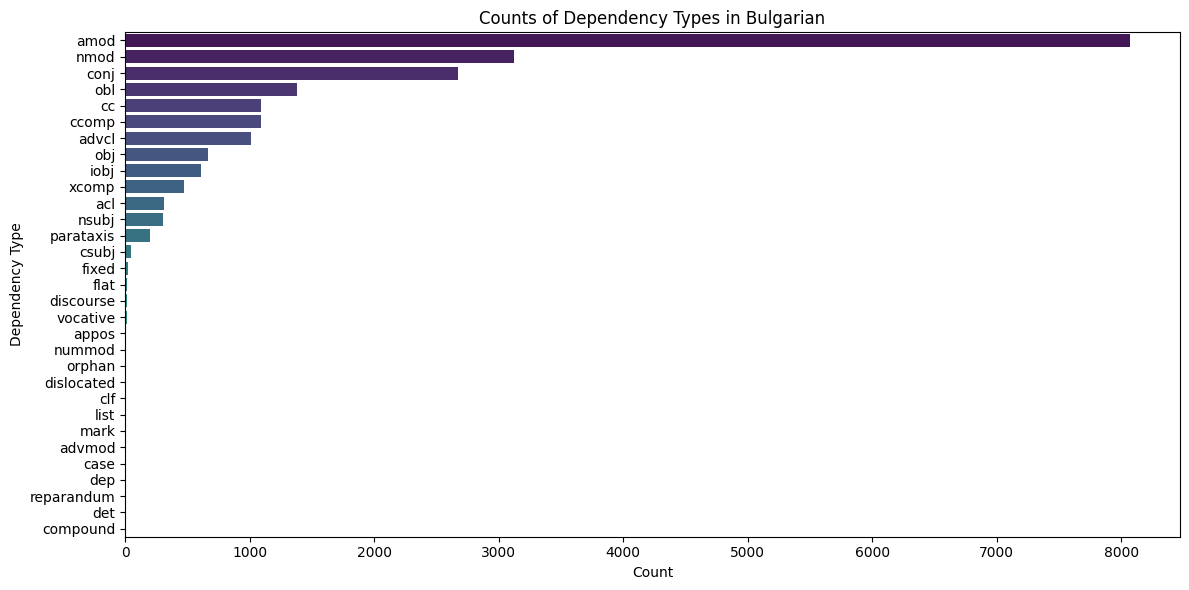

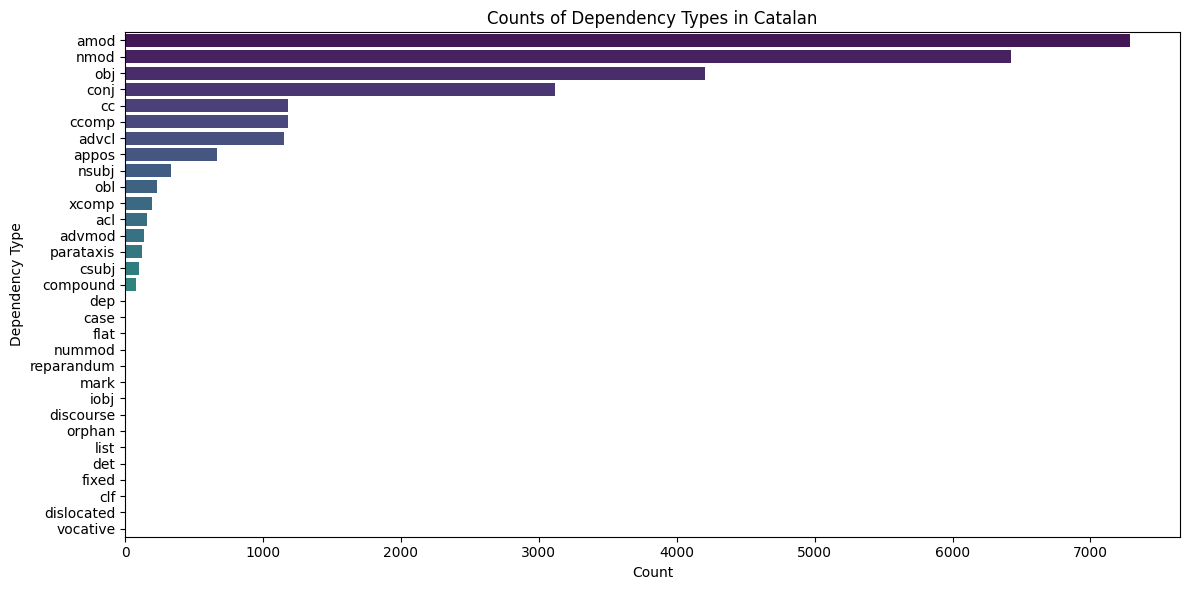

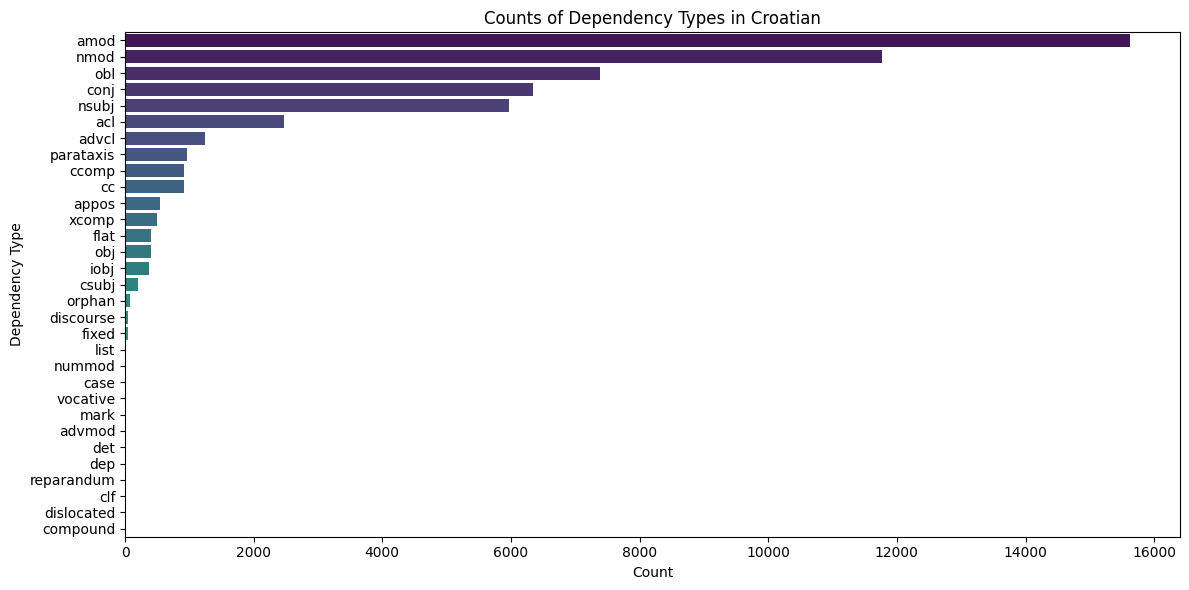

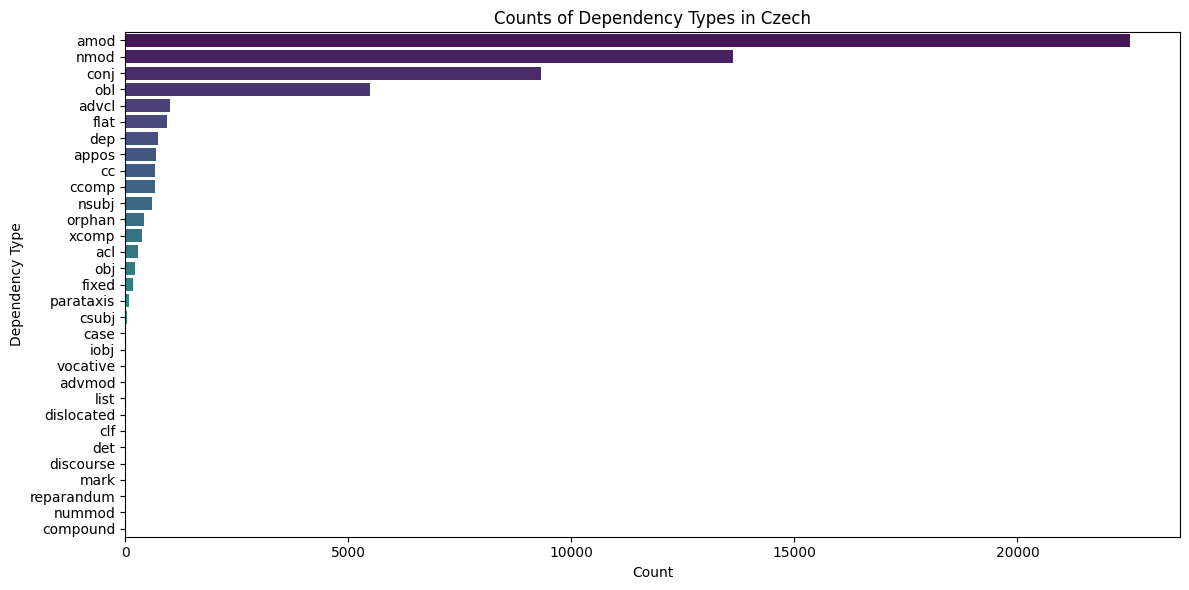

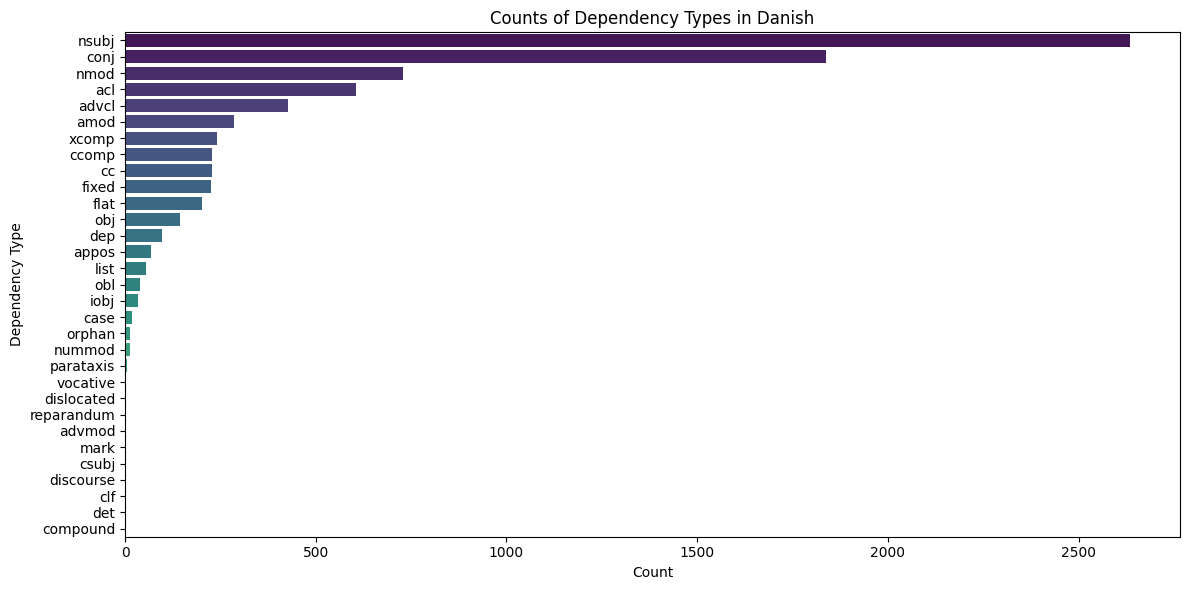

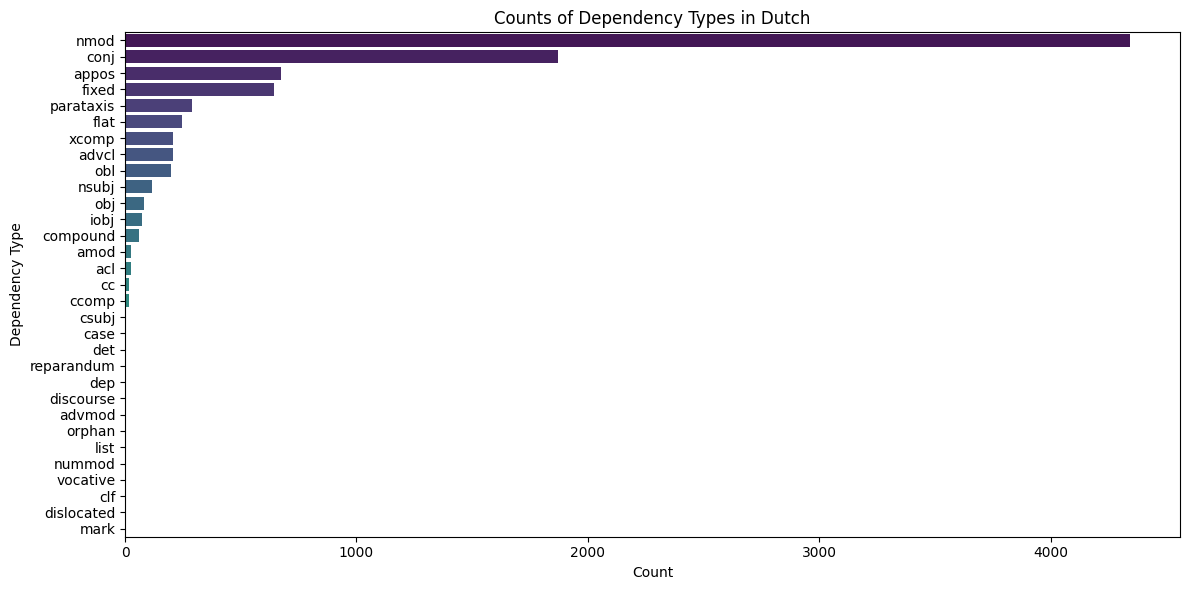

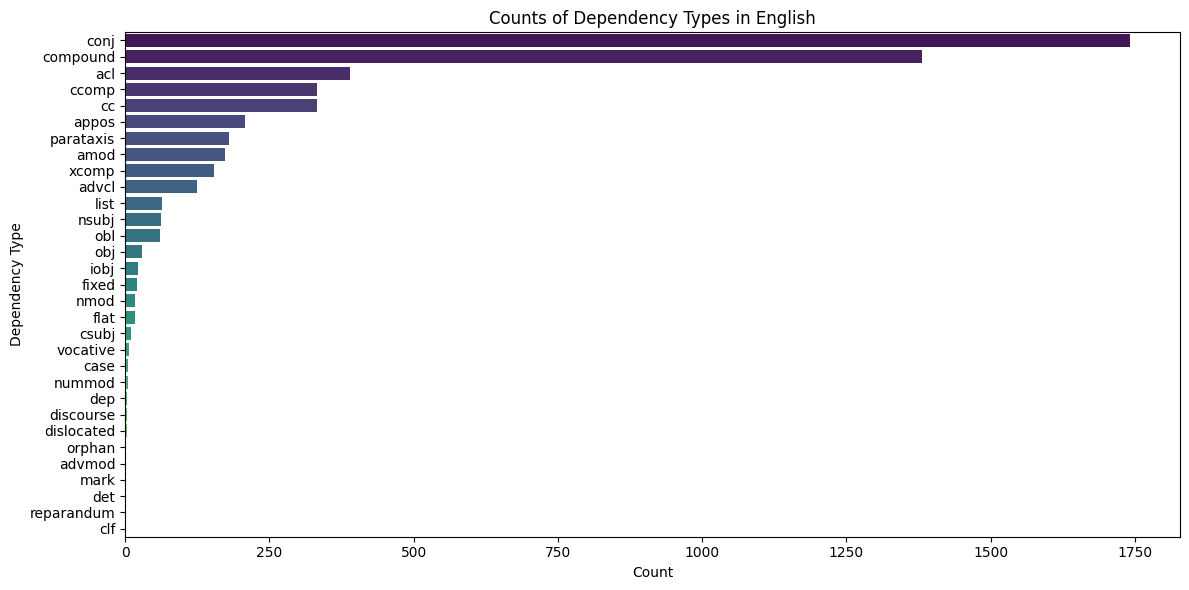

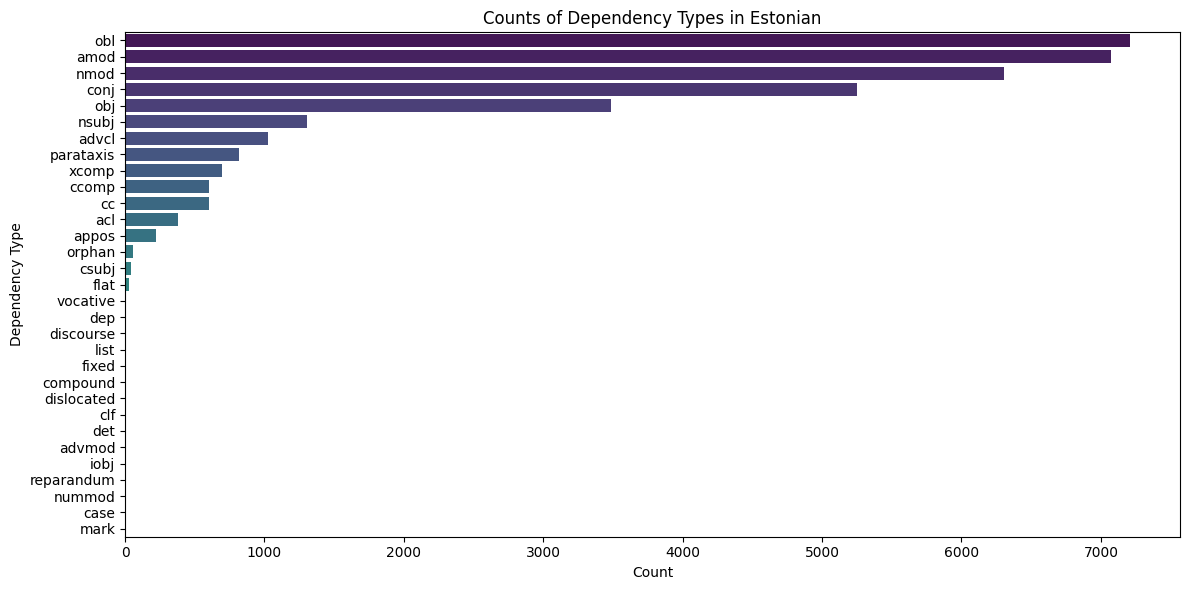

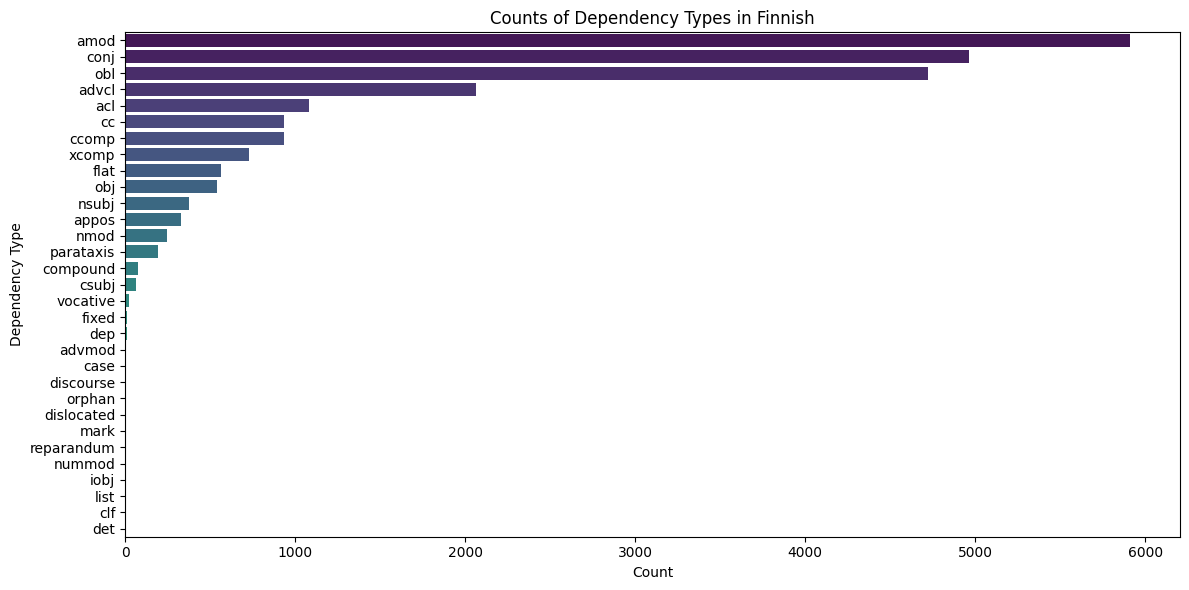

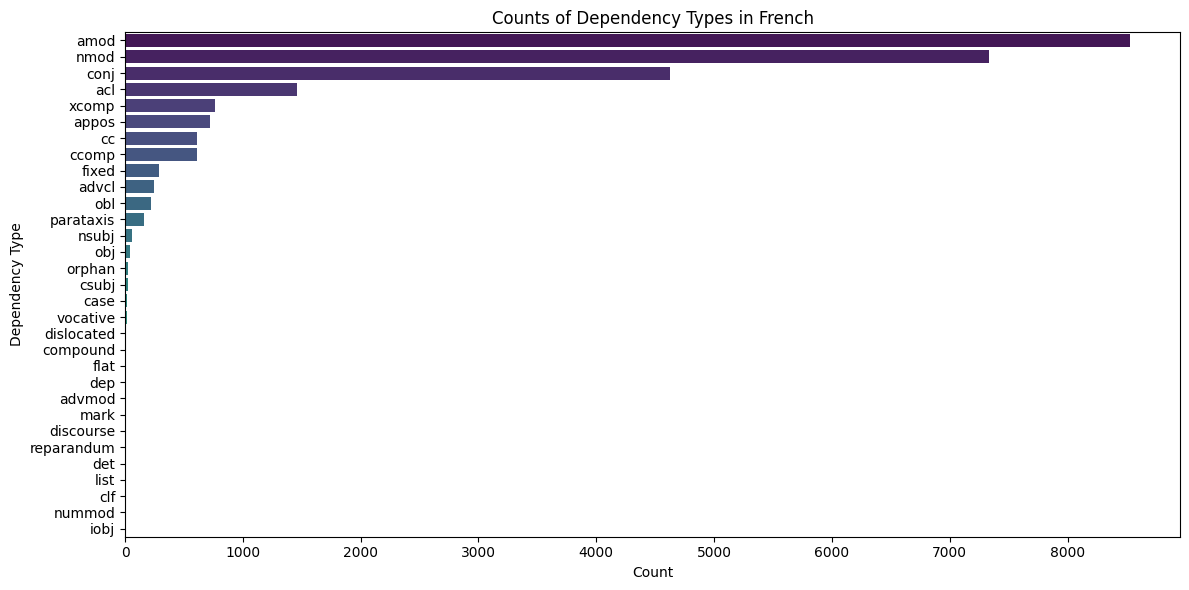

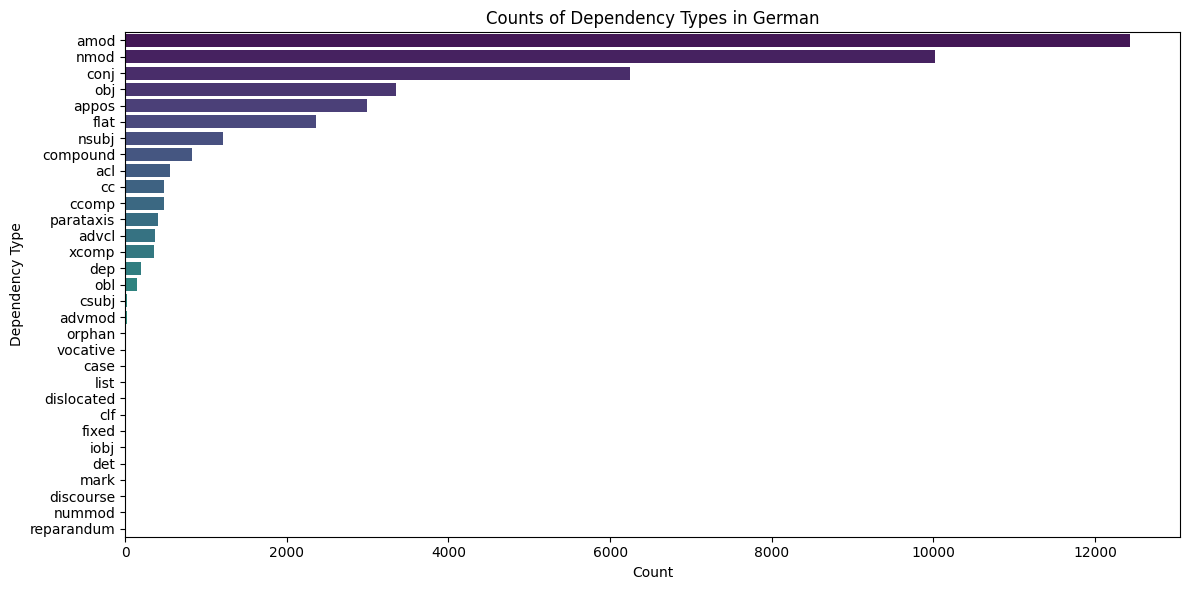

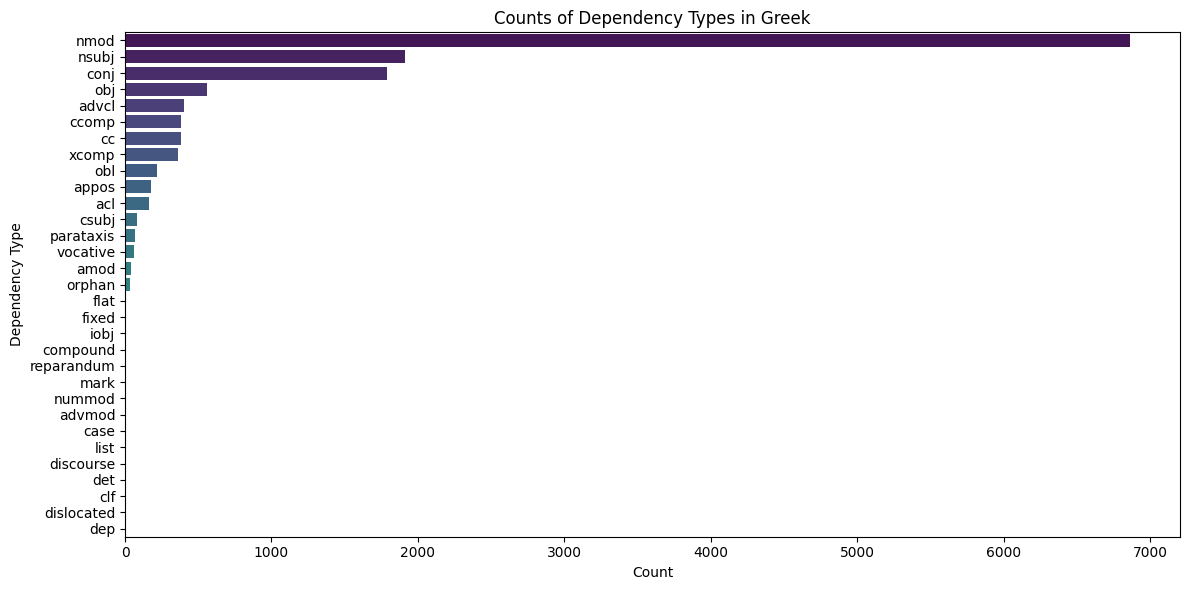

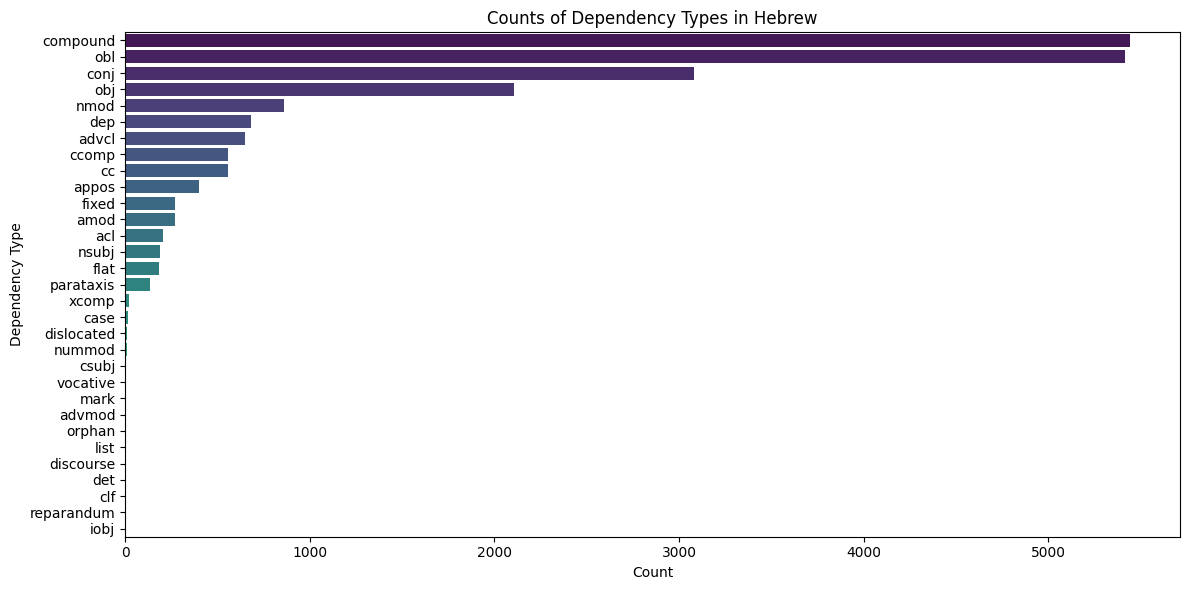

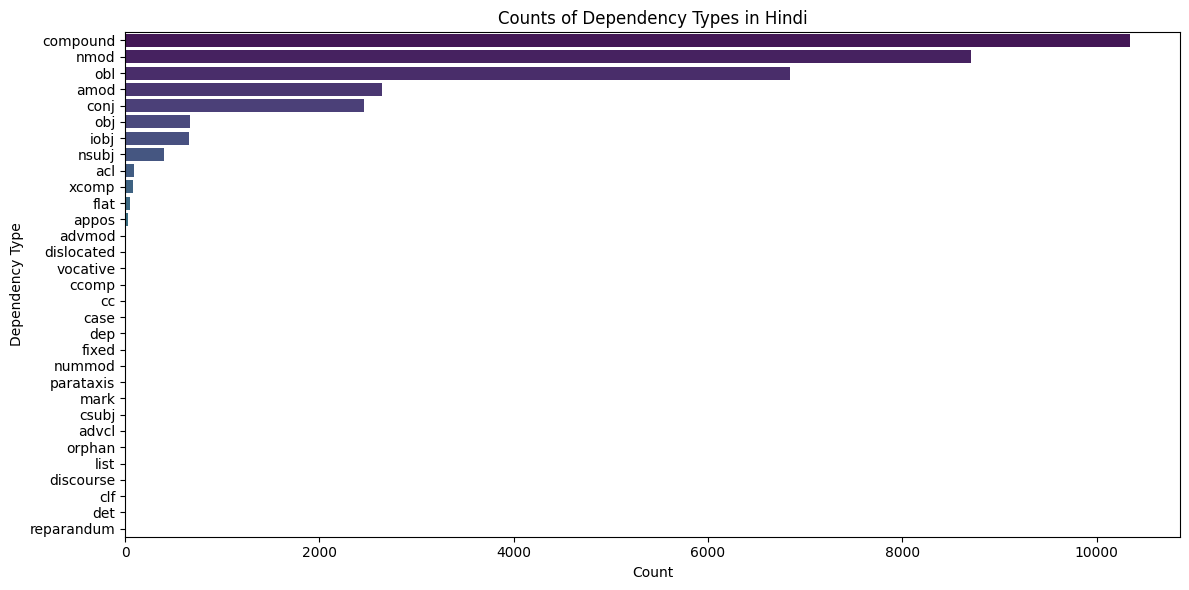

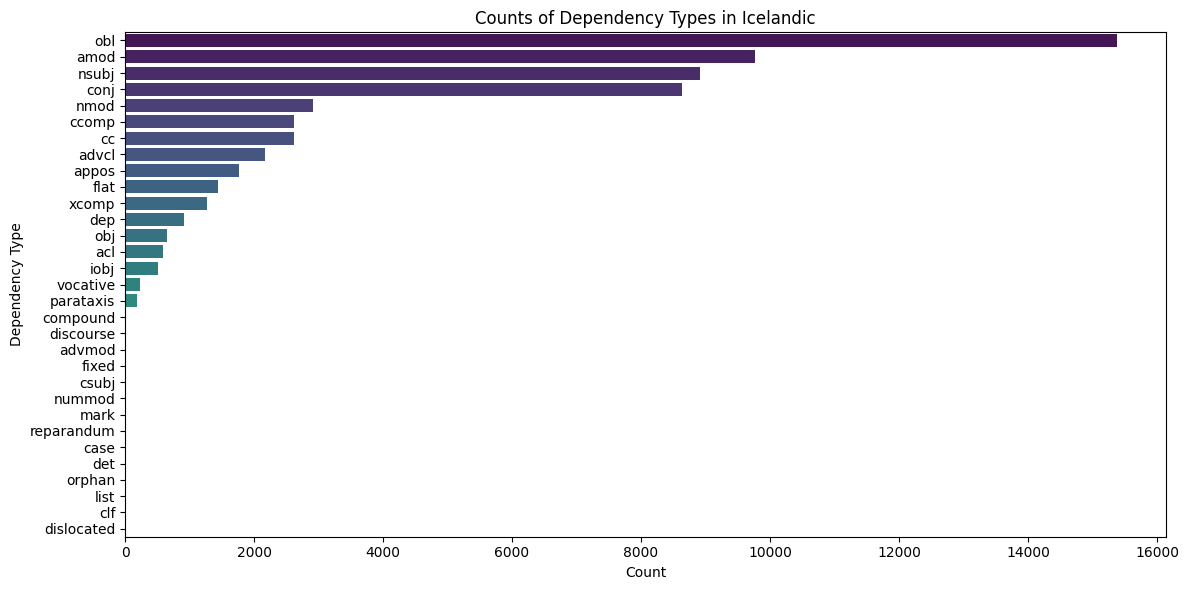

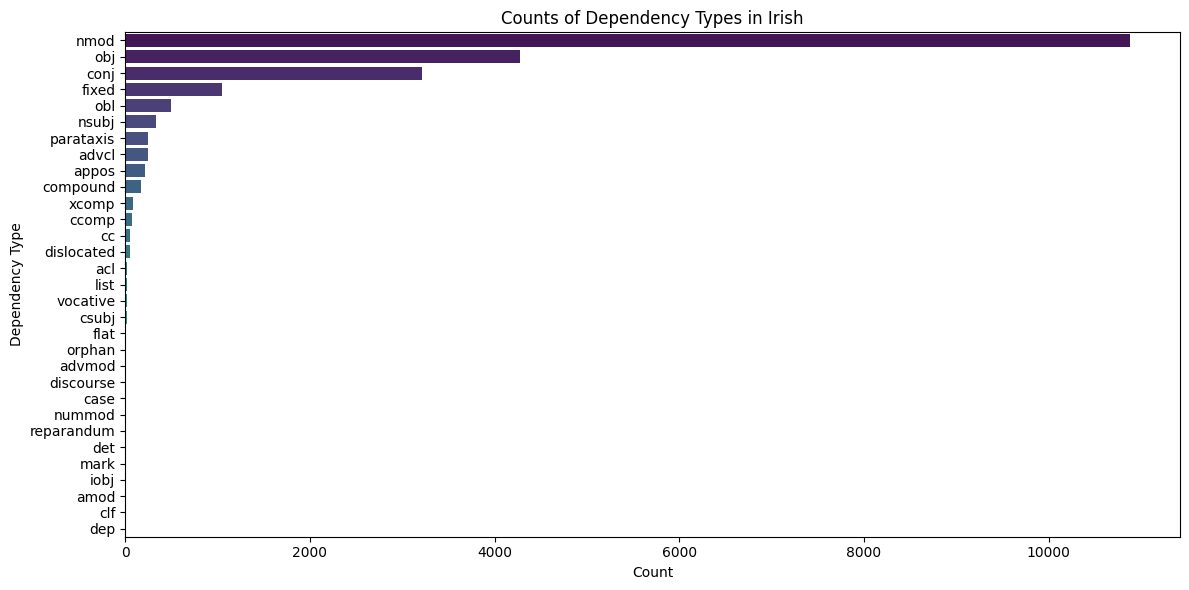

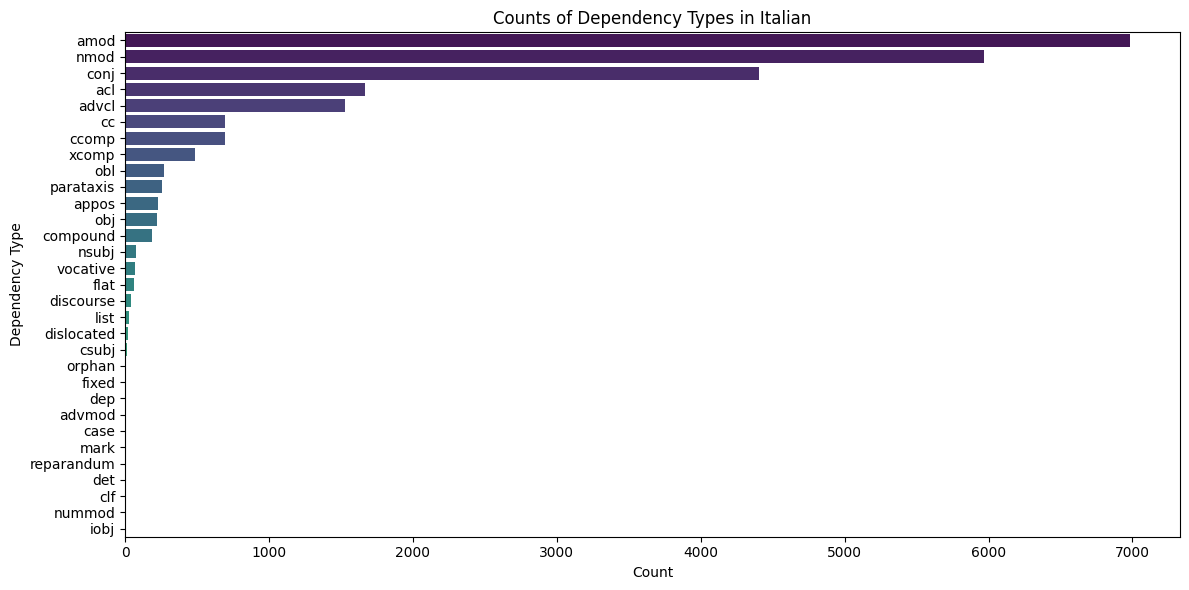

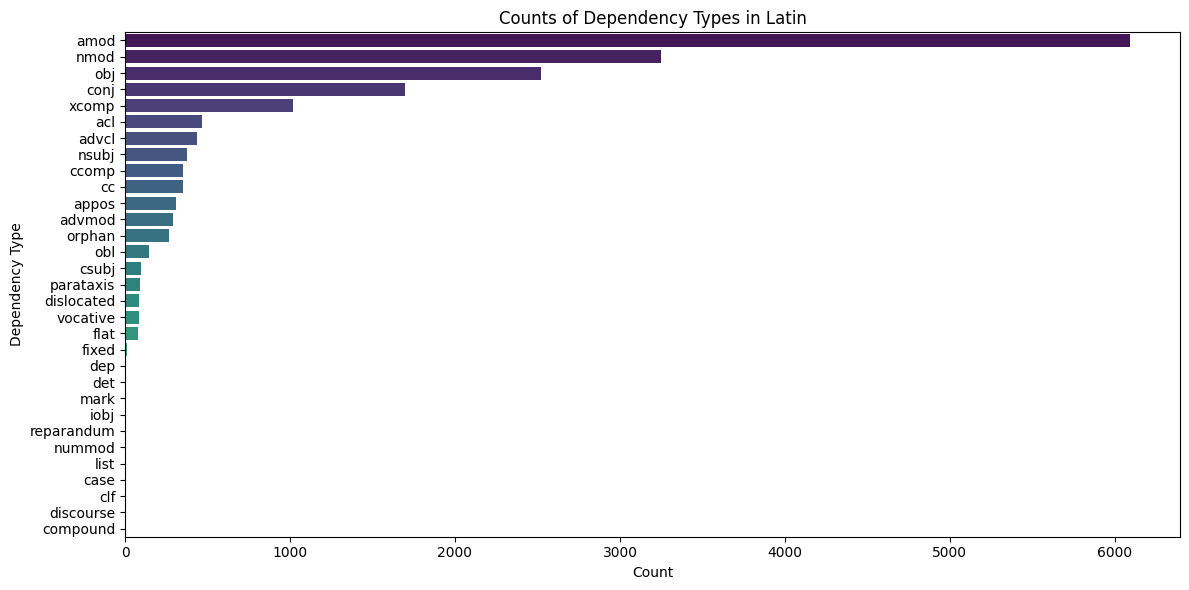

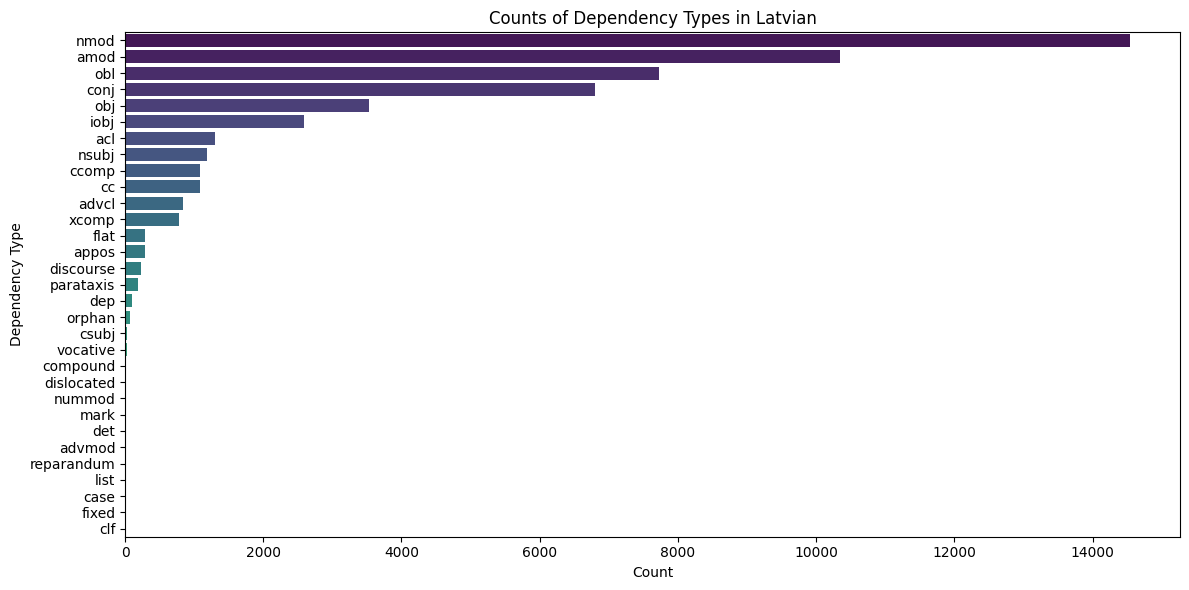

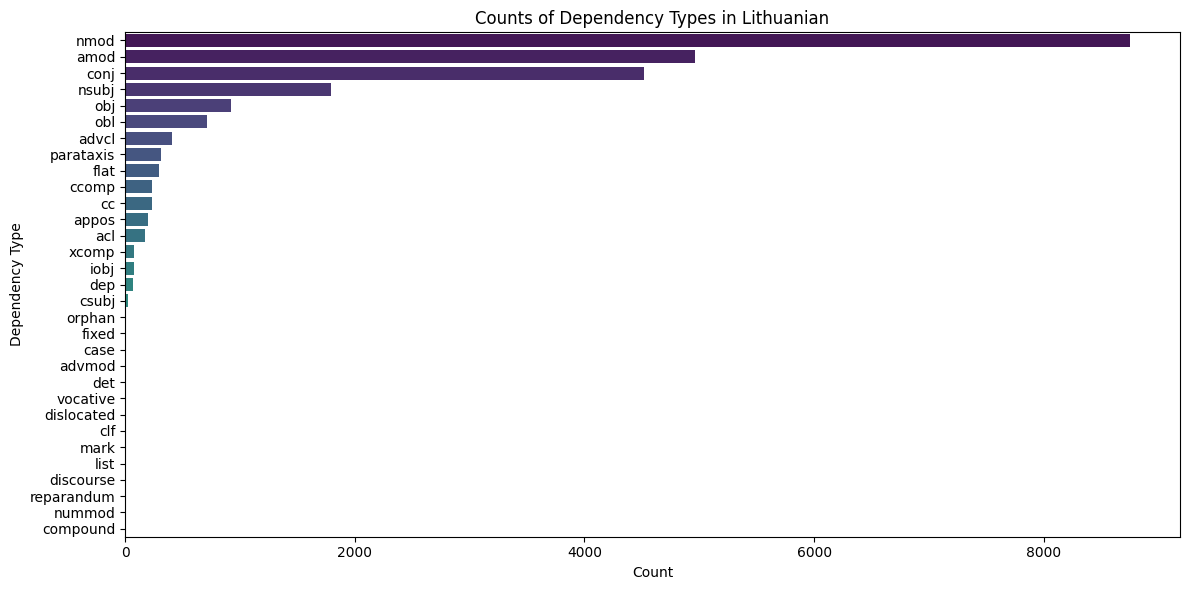

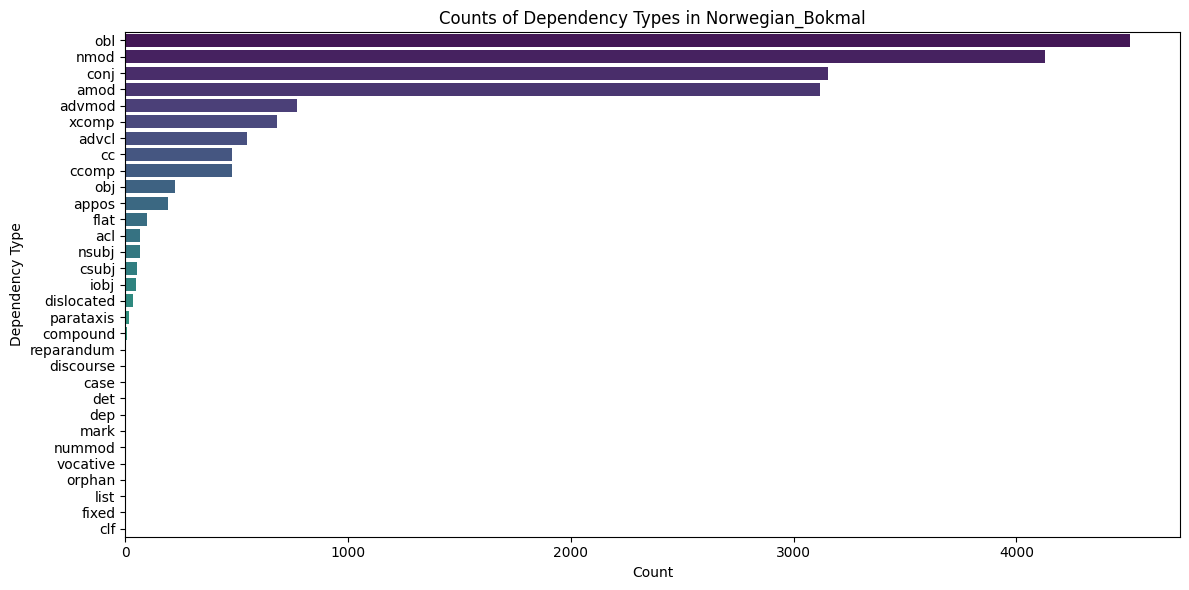

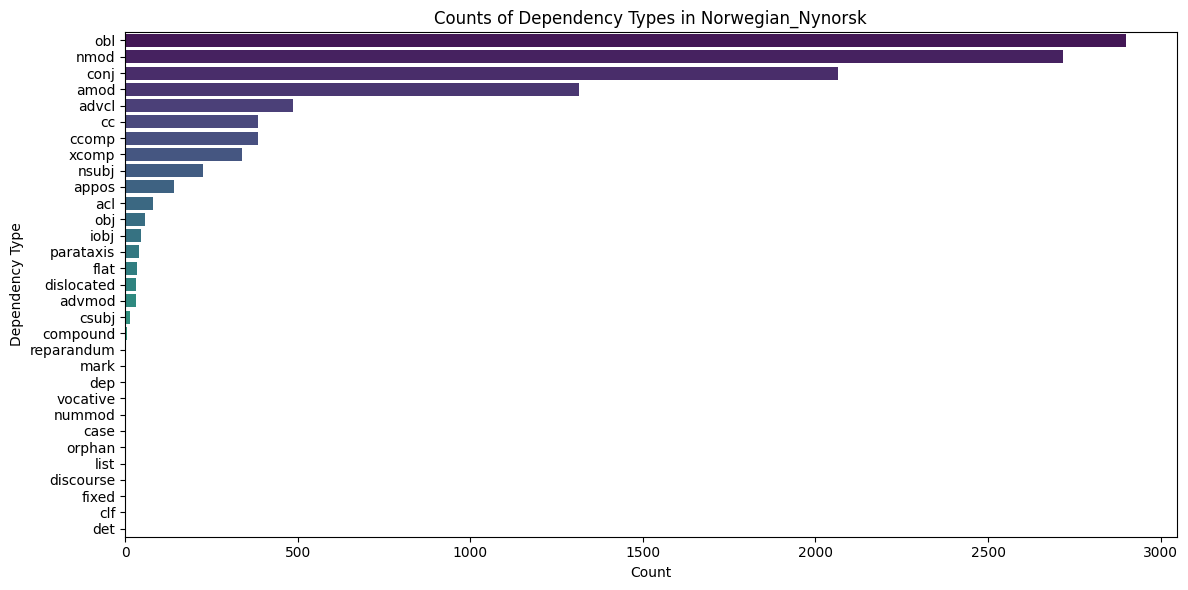

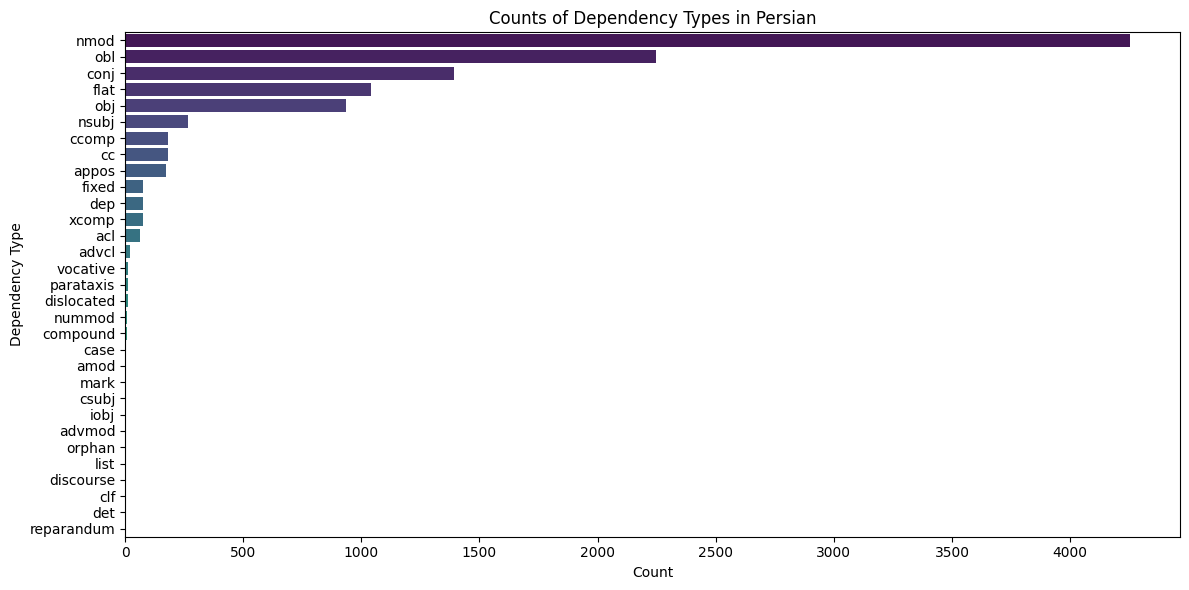

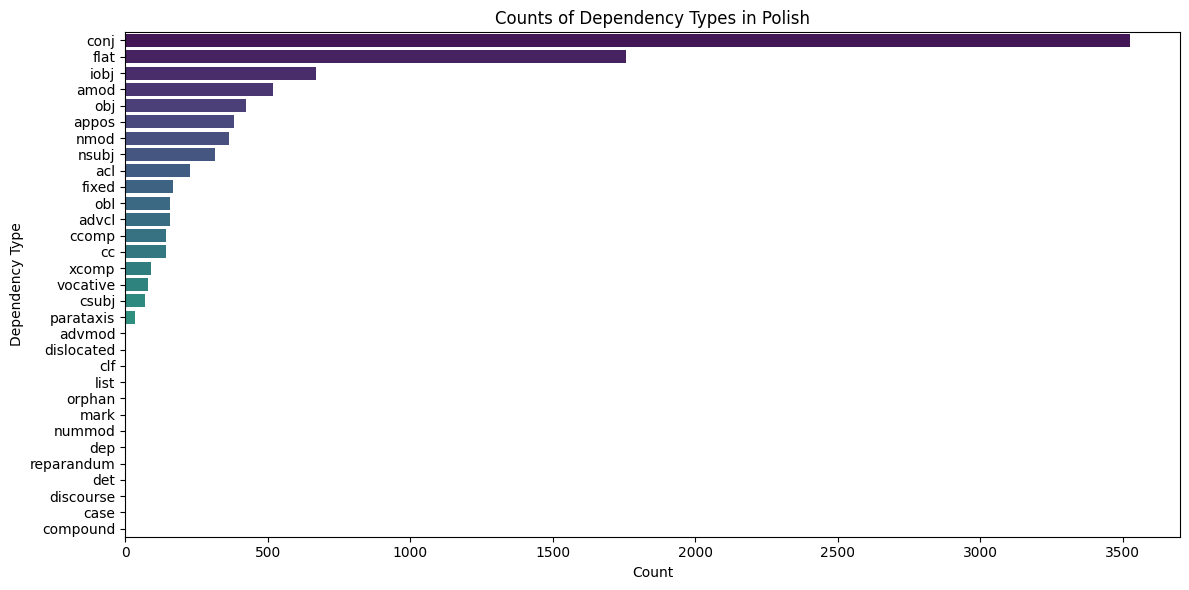

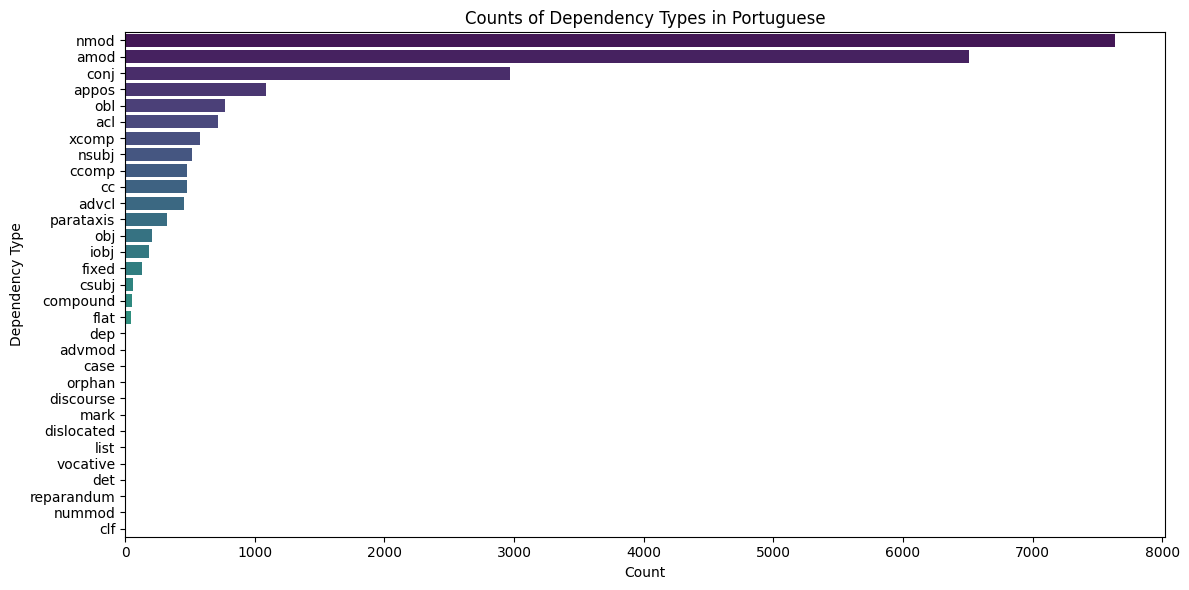

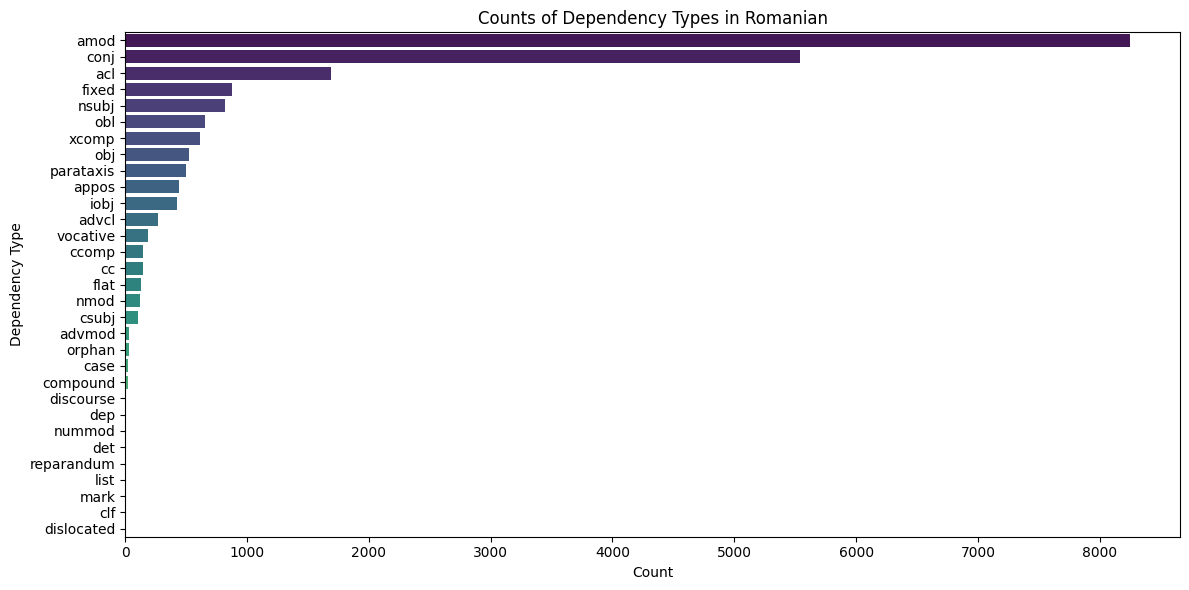

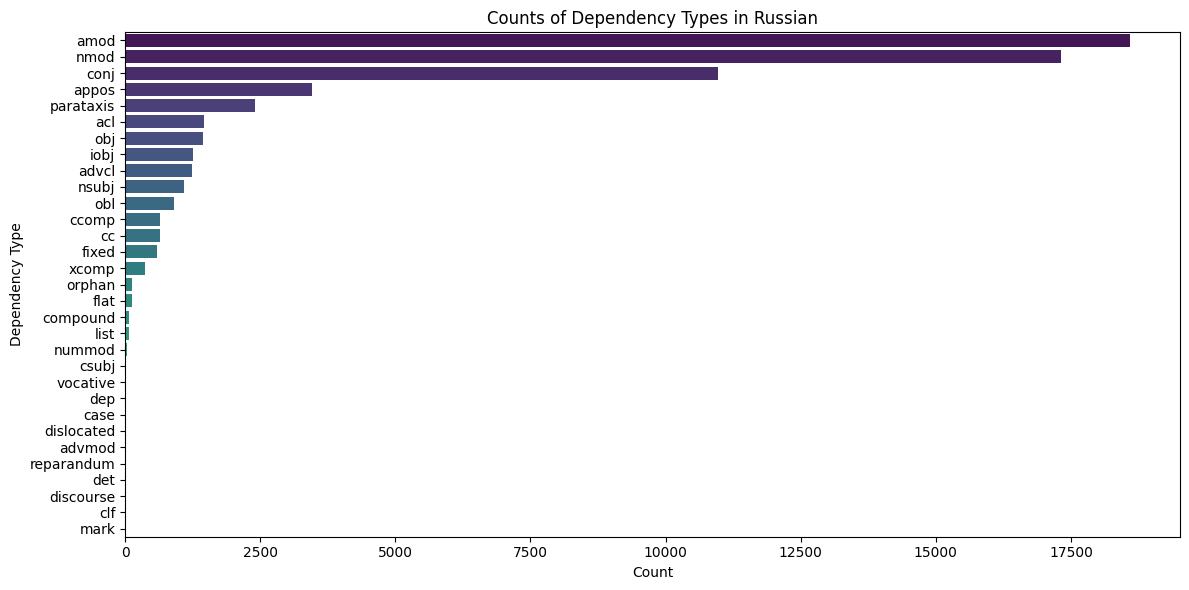

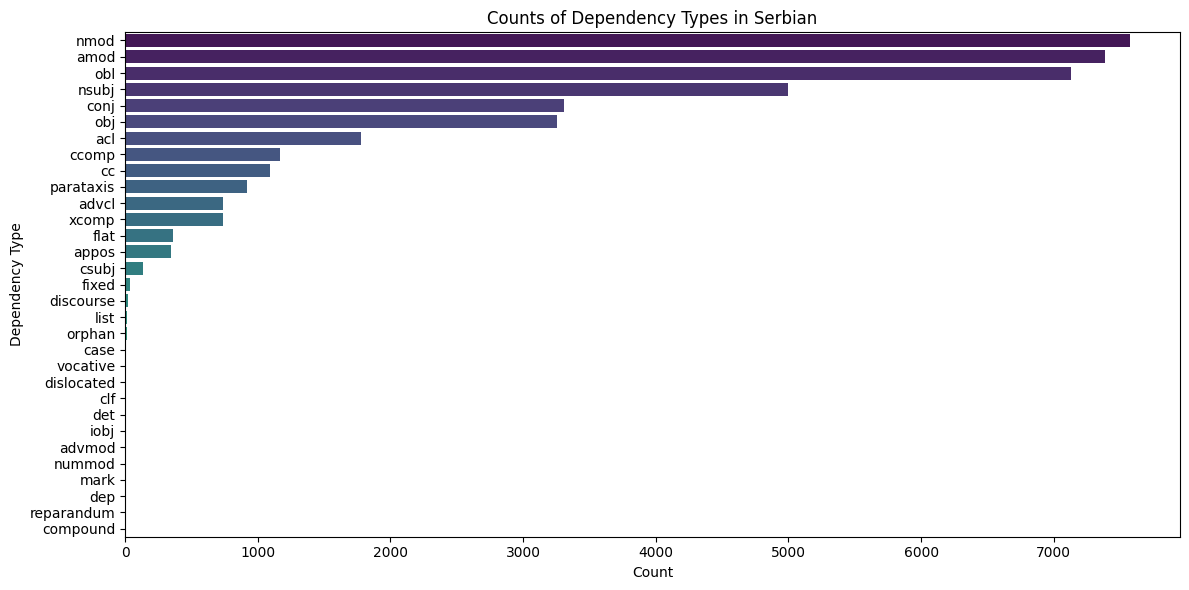

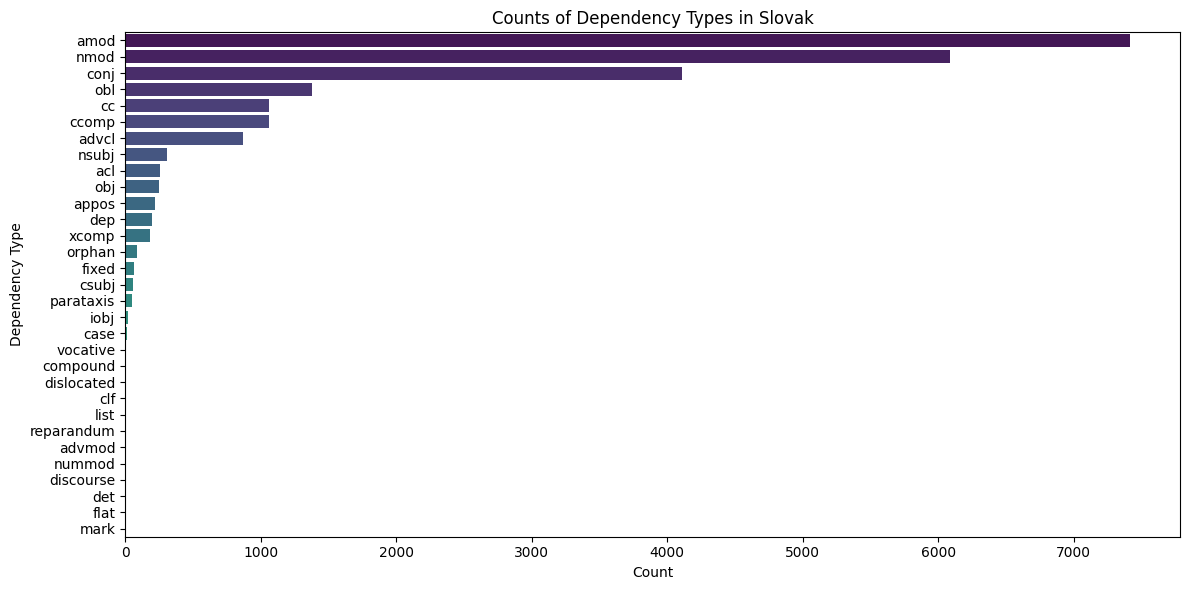

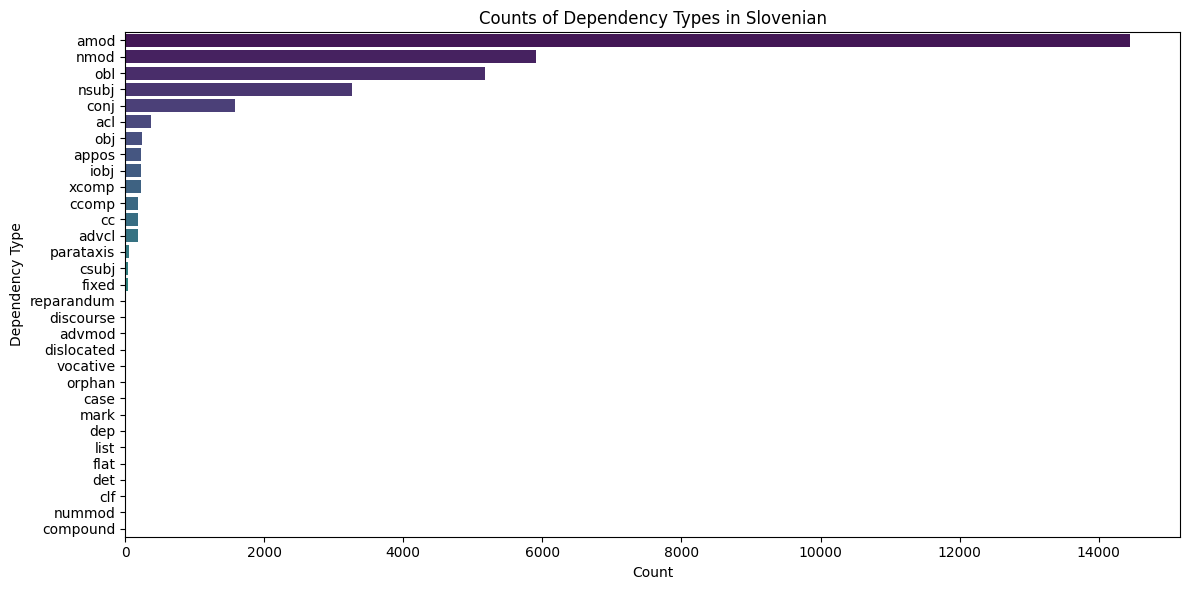

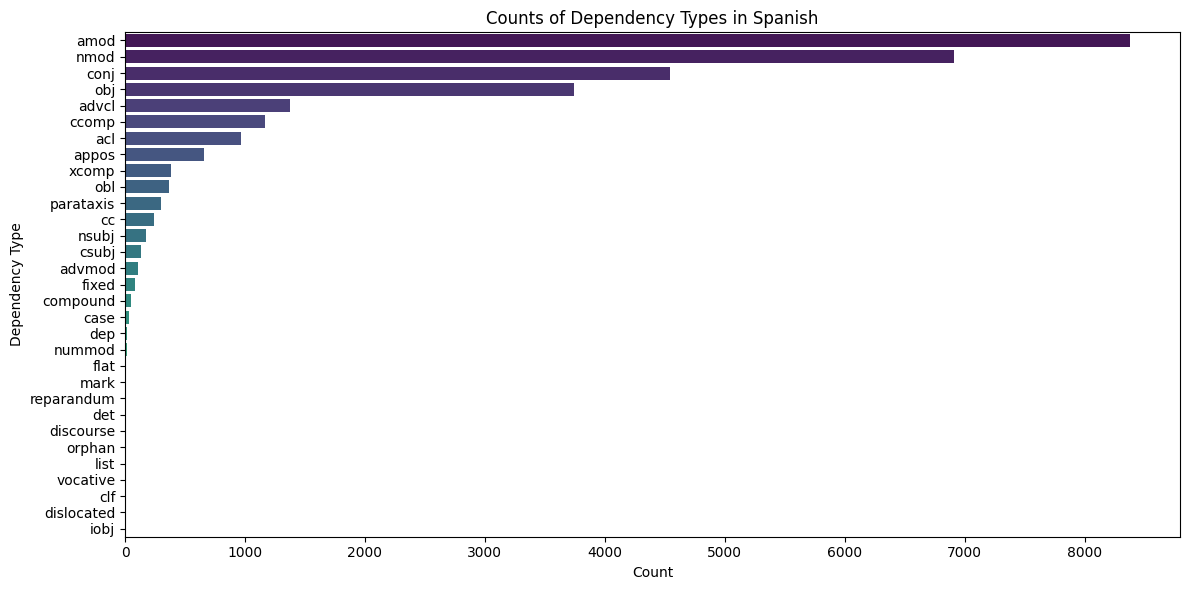

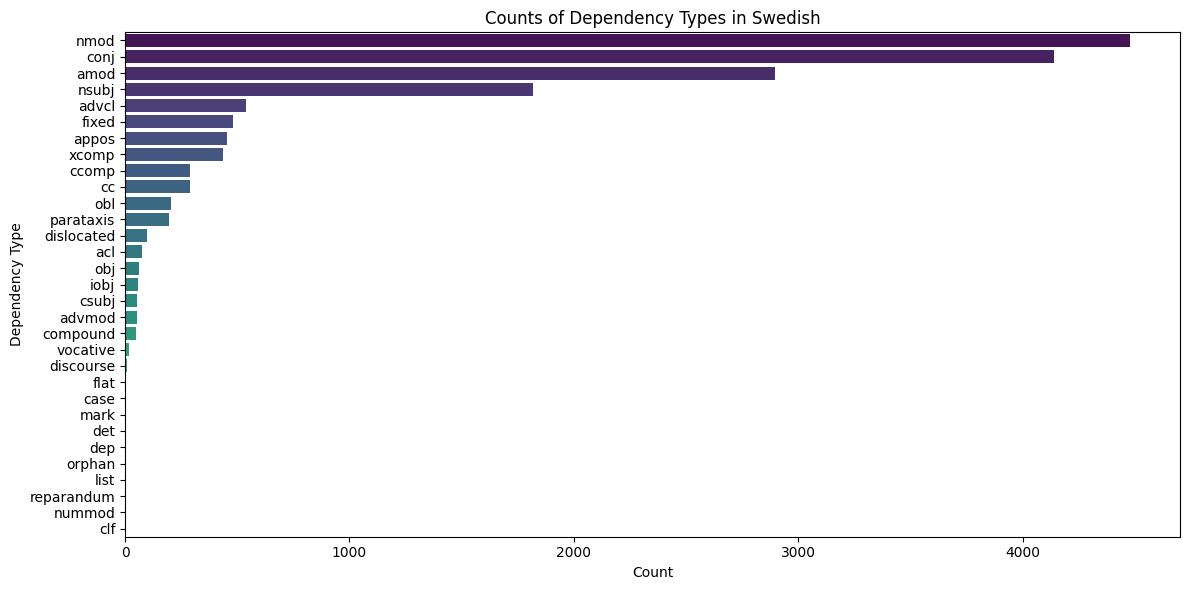

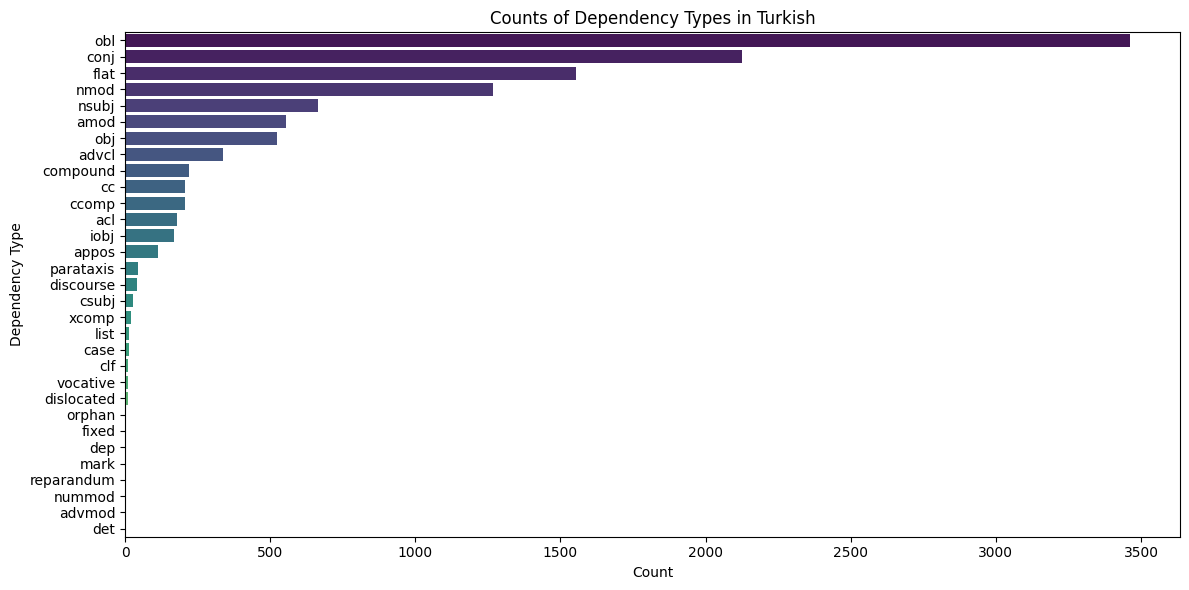

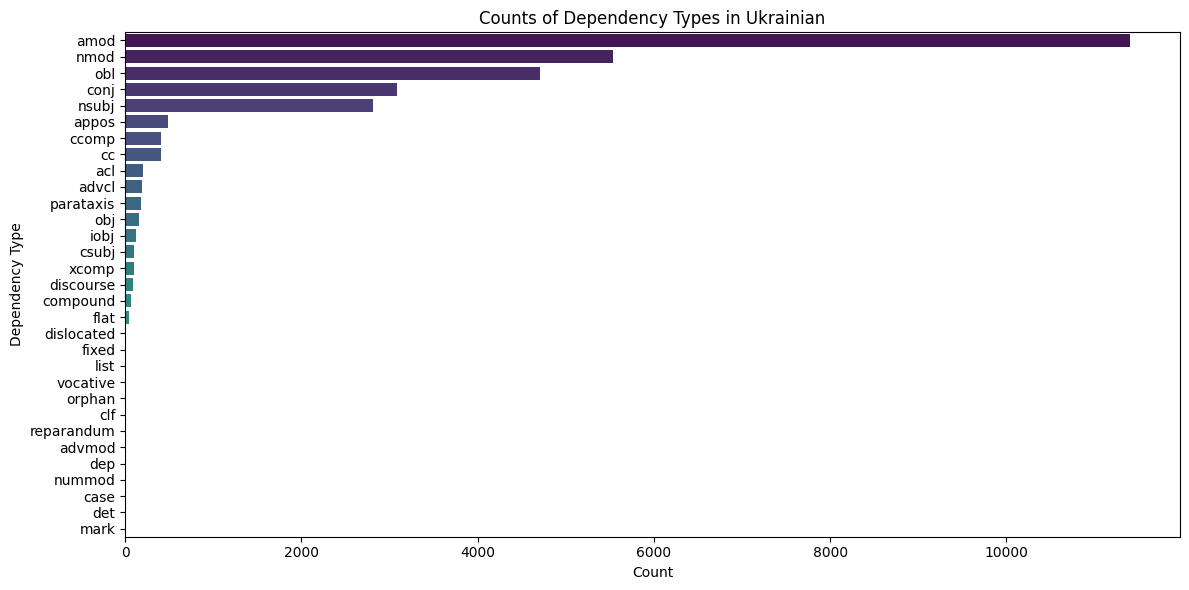

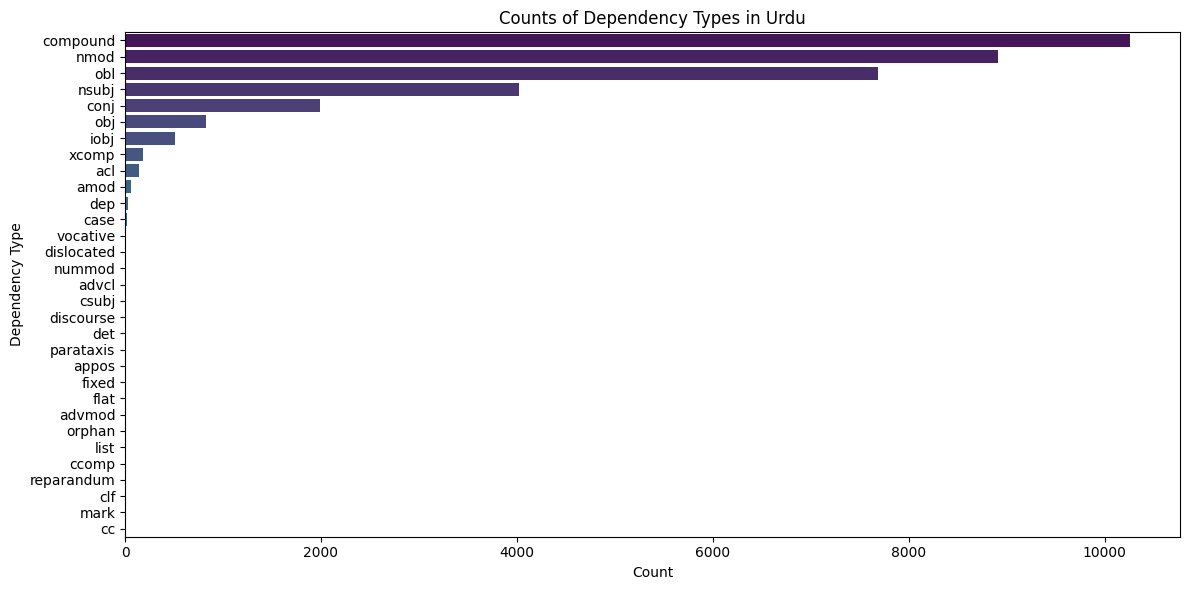

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your fixed data from the CSV file (replace 'fixed_data.csv' with your actual file)
df = pd.read_csv('fixed_data.tsv',sep='\t')
print(df)


# Overall counts of dependency types
overall_counts = df.drop(['Language', 'POS', 'File'], axis=1).sum().reset_index()
overall_counts.columns = ['Dependency Type', 'Count']

# Sort the overall counts by count in descending order
overall_counts = overall_counts.sort_values(by='Count', ascending=False)
# Convert the 'Count' column to numeric
overall_counts['Count'] = pd.to_numeric(overall_counts['Count'], errors='coerce')

# Create a bar chart for overall counts
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Dependency Type', data=overall_counts, palette='viridis')
plt.title('Overall Counts of Dependency Types')
plt.xlabel('Count')
plt.ylabel('Dependency Type')
plt.tight_layout()
plt.show()

# Counts of dependency types per language
counts_per_language = df.drop(['POS', 'File'], axis=1).groupby('Language').sum().reset_index()

# Create bar charts for counts of dependency types per language
for index, row in counts_per_language.iterrows():
    language = row['Language']
    data = row.drop(['Language'])
    data = data.reset_index()
    data.columns = ['Dependency Type', 'Count']

    # Sort the counts for the specific language by count in descending order
    data = data.sort_values(by='Count', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Count', y='Dependency Type', data=data, palette='viridis')
    plt.title(f'Counts of Dependency Types in {language}')
    plt.xlabel('Count')
    plt.ylabel('Dependency Type')
    plt.tight_layout()
    plt.show()


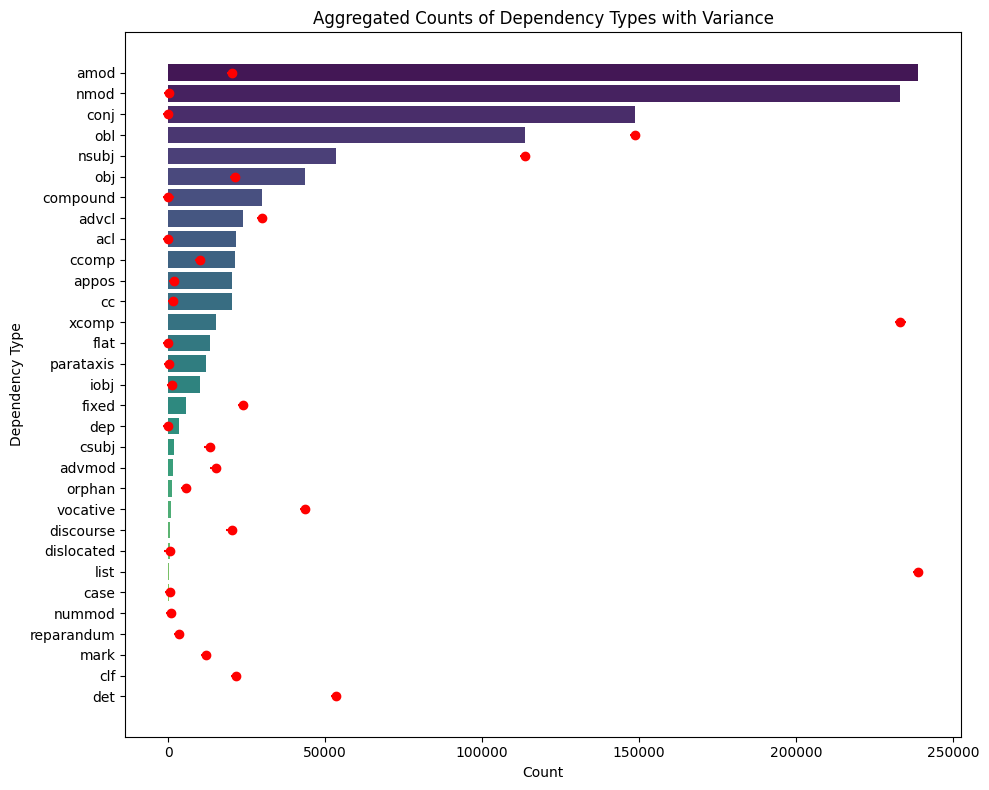

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your fixed data from the CSV file (replace 'fixed_data.csv' with your actual file)
df = pd.read_csv('fixed_data.tsv', sep='\t')

# Overall counts of dependency types
overall_counts = df.drop(['Language', 'POS', 'File'], axis=1).sum().reset_index()
overall_counts.columns = ['Dependency Type', 'Count']

# Sort the overall counts by count in descending order
overall_counts = overall_counts.sort_values(by='Count', ascending=False)

# Calculate the variance among languages for each dependency type
variance_per_dependency = df.drop(['POS', 'File'], axis=1).groupby('Language').sum().var().reset_index()
variance_per_dependency.columns = ['Language', 'Variance']

# Calculate the mean variance across languages
mean_variance = variance_per_dependency['Variance'].mean()

# Create a bar chart for overall counts with error bars representing variance
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Dependency Type', data=overall_counts, palette='viridis',errorbar="sd")
plt.title('Aggregated Counts of Dependency Types with Variance')
plt.xlabel('Count')
plt.ylabel('Dependency Type')

# Add error bars based on mean variance
for index, row in overall_counts.iterrows():
    dependency_type = row['Dependency Type']
    variance = mean_variance  # Use the mean variance across languages
    plt.errorbar(x=row['Count'], y=index, xerr=variance**0.5, fmt='o', color='red')

plt.tight_layout()
plt.show()
